# Week 6 -- Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.simplefilter('ignore')

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Update the number of weeks

In [3]:
no_games = 6

## Functions

In [4]:
def per_week_stats(dataframe, column1, column2):
    dataframe[column1 + '_pG'] = dataframe[column1]/dataframe[column2]

In [5]:
def per_week(dataframe, column1, no_games):
    dataframe[column1 + '_pG'] = dataframe[column1]/no_games

In [6]:
def print_metric(dataframe, metric, player_inx):
    average = round(dataframe[metric].mean(), 2)
    player_name = dataframe['Player'][player_inx]
    player = round(dataframe[metric][player_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(player_name + ' ' + metric + ': ' + str(player))
    print('-' * 50)
    return average, player_name, player

In [7]:
def print_metric_team(dataframe, metric, team_inx):
    average = round(dataframe[metric].mean(), 2)
    team_name = dataframe['Team'][team_inx]
    team = round(dataframe[metric][team_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(team_name + ' ' + metric + ': ' + str(team))
    print('-' * 50)
    return average, team_name, team

In [8]:
def bar_plot(x, y, metric, x_label, y_label):
    plt.figure(figsize = (10, 6))
    
    plt.bar(x, y)
    
    plt.title(metric)
    plt.xlabel(x_label)
    plt.xticks(rotation=45)
    plt.ylabel(y_label)
    plt.show()

## Read in DataFrames

In [9]:
offense = pd.read_pickle('players')
defense = pd.read_pickle('defense')
kicking_df = pd.read_pickle('kicking')

In [10]:
print(offense.shape)
offense.head()

(518, 35)


,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6
0,Alvin Kamara,NOR,RB,25,5,4,0,0,0,0,0,61,281,10.10,4,45,38,395,13.90,3,0,0,7,0,0,128.60,1,1,109.60,18.70,29.40,31.70,17.90,11.90,0.00
1,Derrick Henry,TEN,RB,26,5,5,0,0,0,0,0,123,588,11.80,6,15,8,84,15.00,0,0,0,6,0,0,107.20,2,2,103.20,13.10,8.40,25.00,0.00,18.30,38.40
2,Kyler Murray,ARI,QB,23,6,6,135,205,1487,10,6,51,370,9.50,6,0,0,0,0.00,0,1,1,6,0,0,164.50,1,3,164.40,27.30,33.10,24.70,23.10,27.30,28.90
3,Patrick Mahomes,KAN,QB,25,6,6,144,219,1699,15,1,34,165,12.50,2,0,0,0,0.00,0,1,0,2,0,2,159.50,2,4,159.40,20.40,27.50,40.00,20.20,30.70,20.60
4,Dalvin Cook,MIN,RB,25,5,5,0,0,0,0,0,92,489,8.20,7,16,12,64,8.30,0,1,1,7,3,0,107.30,3,5,101.30,20.80,15.10,23.90,26.60,14.90,0.00


In [11]:
print(defense.shape)
defense.head()

(32, 30)


,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6
0,Pittsburgh Steelers,5,94,294,4.90,1426,99,331,3.30,3,171,5.60,100,12.60,1095,9,13,8,61.50,9,8,1,24,54.00,8.00,13.00,7.00,10.00,8.00,18.00
1,Baltimore Ravens,6,104,397,5.10,2039,143,654,4.60,4,232,5.50,149,10.50,1385,8,13,10,76.90,11,3,8,22,70.00,15.00,15.00,1.00,6.00,26.00,7.00
2,Denver Broncos,5,110,337,5.20,1749,130,553,4.30,3,193,5.80,127,10.20,1196,7,15,7,46.70,5,3,2,14,28.00,2.00,5.00,1.00,6.00,0.00,14.00
3,New England Patriots,5,110,292,5.80,1695,141,596,4.20,1,143,7.30,94,12.40,1099,9,14,7,50.00,10,6,4,8,43.00,11.00,6.00,15.00,4.00,0.00,7.00
4,Arizona Cardinals,6,112,403,5.20,2077,165,718,4.40,3,221,5.70,138,10.80,1359,9,24,10,41.70,7,3,4,17,40.00,4.00,9.00,4.00,1.00,7.00,15.00


In [12]:
per_week_stats(defense, 'Ttl_Pts_Allowed', 'GP')
per_week_stats(defense, 'Ttl_Yds', 'GP')
per_week_stats(defense, 'Rushing_Att', 'GP')
per_week_stats(defense, 'Rushing_Yds', 'GP')
per_week_stats(defense, 'Passing_Att', 'GP')
per_week_stats(defense, 'Completions', 'GP')
defense['Completion_Percent_Allowed'] = defense['Completions']/defense['Passing_Att']
per_week_stats(defense, 'Passing_Yds', 'GP')
per_week_stats(defense, 'Sacks', 'GP')
per_week_stats(defense, 'TTL', 'GP')

In [13]:
offense[offense['Player'] == "Ronald Jones II"]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6
34,Ronald Jones II,TAM,RB,23,6,6,0,0,0,0,0,97,472,12.70,3,25,17,84,13.40,0,0,0,3,0,0,82.10,14,35,73.60,8.20,8.70,7.30,12.80,12.50,24.10


In [14]:
taken_wrt = ['Davantae Adams', 'Keenan Allen', 'Mark Andrews', 'Odell Beckham Jr.', "Le'Veon Bell", 
             'A.J. Brown', 'John Brown', 'Marquise Brown', 'DJ Chark', 'Nick Chubb', 'Chase Claypool', 'James Conner',
             'Dalvin Cook', 'Jared Cook', 'Amari Cooper', 'Mike Davis', 'Stefon Diggs', 'Kenyan Drake',  
             'Clyde Edwards-Helaire', 'Austen Ekeler', 'Ezekiel Elliott', 'Evan Engram', 'Zach Ertz', 'Mike Evans', 
             'Noah Fant', 'Will Fuller', 'Michael Gallup', 'Mike Gesicki', 'Antonio Gibson', 'Chris Godwin',
             'Kenny Golladay', 'Melvin Gordon', 'Todd Gurley', 'Hunter Henry', 'Tyler Higbee', 
             'Tyreek Hill', 'T.Y. Hilton', 'T.J. Hockenson', 'Jordan Howard', 'Kareem Hunt', 'Hayden Hurst', 
             'Josh Jacobs', 'David Johnson', 'Aaron Jones', 'Ronald Jones II', 'Alvin Kamara', 'Travis Kelce', 
             'George Kittle', 'Cooper Kupp', 'CeeDee Lamb', 'Tyler Lockett', 'Christian McCaffrey',
             'Jerick McKinnon', 'Terry McLaurin', 'D.K. Metcalf', 'Joe Mixon', 'David Montgomery', 'DJ Moore', 
             'Zack Moss', 'Raheem Mostert', 'DeVante Parker', 'Calvin Ridley', 'James Robinson', 'Allen Robinson', 
             'Miles Sanders', 'Devin Singletary', 'Darius Slayton', 'JuJu Smith-Schuster', 'Jonathan Taylor', 
             'Adam Thielen', 'Michael Thomas', 'Darren Waller', 'Robert Woods']


In [15]:
taken_qbs = ['Josh Allen', 'Tom Brady', 'Drew Brees', 'Joe Burrow', 'Jared Goff', 'Lamar Jackson', 'Daniel Jones', 
             'Patrick Mahomes', 'Baker Mayfield', 'Kyler Murray', 'Cam Newton', 'Ben Roethlisberger', 'Matt Ryan', 
             'Matthew Stafford', 'Ryan Tannehill', 'Deshaun Watson', 'Russell Wilson']

In [16]:
taken_k = ['Harrison Butker', 'Jake Elliot', 'Matt Gay', 'Zane Gonzalez', 'Younghoe Koo', 'Wil Lutz', 
           'Justin Tucker', 'Greg Zuerlein']

In [18]:
myteam_wrt = ['Robby Anderson', 'Chris Carson', 'Jamison Crowder', 'Jimmy Graham', 'Damien Harris',
              'Darrell Henderson', 'Derrick Henry', 'DeAndre Hopkins', 'Diontae Johnson', 'Julio Jones', 
              'Jonnu Smith']


## QB Analysis

In [43]:
quarterbacks = offense[offense['Position'] == 'QB']
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6
2,Kyler Murray,ARI,QB,23,6,6,135,205,1487,10,6,51,370,9.50,6,0,0,0,0.00,0,1,1,6,0,0,164.50,1,3,164.40,27.30,33.10,24.70,23.10,27.30,28.90
3,Patrick Mahomes,KAN,QB,25,6,6,144,219,1699,15,1,34,165,12.50,2,0,0,0,0.00,0,1,0,2,0,2,159.50,2,4,159.40,20.40,27.50,40.00,20.20,30.70,20.60
8,Josh Allen,BUF,QB,24,6,6,145,216,1711,16,4,37,143,11.60,3,0,0,0,0.00,0,3,3,3,0,0,154.70,3,9,154.70,28.20,34.50,32.20,25.40,18.30,16.10
11,Russell Wilson,SEA,QB,32,5,5,123,169,1502,19,3,23,153,12.50,0,0,0,0,0.00,0,1,0,0,0,1,150.40,4,12,150.40,31.80,34.40,36.80,21.90,25.50,0.00
24,Dak Prescott,DAL,QB,27,5,5,151,222,1856,9,4,18,93,6.70,3,1,1,11,11.00,1,3,3,4,1,1,139.10,5,25,138.60,17.60,39.80,29.50,38.30,13.40,0.00


In [44]:
per_week_stats(quarterbacks, 'CompletedPasses', 'Games')
per_week_stats(quarterbacks, 'PassesAttempted', 'Games')
quarterbacks['Completion_Percent'] = quarterbacks['CompletedPasses_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'PassingYds', 'Games')
per_week_stats(quarterbacks, 'PassingTDs', 'Games')
quarterbacks['Yds_pAtt'] = quarterbacks['PassingYds_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'Interceptions', 'Games')
per_week_stats(quarterbacks, 'LostFumbles', 'Games')
per_week_stats(quarterbacks, 'RushingYds', 'Games')
per_week_stats(quarterbacks, 'TTL', 'Games')

In [45]:
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
2,Kyler Murray,ARI,QB,23,6,6,135,205,1487,10,6,51,370,9.50,6,0,0,0,0.00,0,1,1,6,0,0,164.50,1,3,164.40,27.30,33.10,24.70,23.10,27.30,28.90,22.50,34.17,0.66,247.83,1.67,7.25,1.00,0.17,61.67,27.40
3,Patrick Mahomes,KAN,QB,25,6,6,144,219,1699,15,1,34,165,12.50,2,0,0,0,0.00,0,1,0,2,0,2,159.50,2,4,159.40,20.40,27.50,40.00,20.20,30.70,20.60,24.00,36.50,0.66,283.17,2.50,7.76,0.17,0.00,27.50,26.57
8,Josh Allen,BUF,QB,24,6,6,145,216,1711,16,4,37,143,11.60,3,0,0,0,0.00,0,3,3,3,0,0,154.70,3,9,154.70,28.20,34.50,32.20,25.40,18.30,16.10,24.17,36.00,0.67,285.17,2.67,7.92,0.67,0.50,23.83,25.78
11,Russell Wilson,SEA,QB,32,5,5,123,169,1502,19,3,23,153,12.50,0,0,0,0,0.00,0,1,0,0,0,1,150.40,4,12,150.40,31.80,34.40,36.80,21.90,25.50,0.00,24.60,33.80,0.73,300.40,3.80,8.89,0.60,0.00,30.60,30.08
24,Dak Prescott,DAL,QB,27,5,5,151,222,1856,9,4,18,93,6.70,3,1,1,11,11.00,1,3,3,4,1,1,139.10,5,25,138.60,17.60,39.80,29.50,38.30,13.40,0.00,30.20,44.40,0.68,371.20,1.80,8.36,0.80,0.60,18.60,27.72


In [46]:
quarterbacks.describe()

,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
count,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,53.00,55.00,55.00,53.00,55.00,55.00,55.00,55.00
mean,28.80,4.02,3.35,76.40,116.64,855.69,5.75,2.71,13.40,59.87,6.33,0.78,0.22,0.18,0.85,0.69,0.02,1.56,0.65,0.80,0.04,0.36,64.99,64.89,11.33,11.88,11.56,11.03,9.59,9.53,16.27,25.20,0.64,179.51,1.15,7.07,0.61,0.16,11.76,13.15
std,5.34,1.84,2.45,57.39,85.50,658.37,5.32,2.39,12.50,83.26,4.51,1.32,0.74,0.51,4.11,3.29,0.13,1.49,1.00,1.35,0.19,0.80,53.68,53.67,10.64,12.20,11.21,11.13,10.59,10.88,9.07,13.33,0.14,106.04,0.95,2.83,0.50,0.24,15.02,8.97
min,22.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-5.00,-1.00,0.00,0.00,0.00,-6.00,-6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.10,0.00,-0.80,-0.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-3.00,0.10
25%,24.00,3.00,1.00,15.50,27.00,169.00,0.50,1.00,5.00,1.50,3.30,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,10.15,10.15,0.00,0.00,0.00,0.00,0.00,0.00,11.25,19.25,0.59,120.83,0.17,5.96,0.18,0.00,1.00,4.92
50%,28.00,4.00,4.00,89.00,141.00,878.00,6.00,2.00,11.00,30.00,6.30,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,61.00,61.00,12.20,11.70,12.20,11.10,5.80,5.50,19.75,29.17,0.65,204.67,1.00,7.01,0.67,0.00,7.00,14.32
75%,32.00,6.00,6.00,128.00,193.50,1481.00,10.00,4.00,19.00,90.00,9.25,1.00,0.00,0.00,0.00,0.00,0.00,2.50,1.00,1.00,0.00,0.00,113.05,112.60,19.90,20.65,18.85,21.40,18.85,17.50,23.38,34.70,0.69,266.27,1.82,7.92,1.00,0.29,17.50,19.67
max,43.00,6.00,6.00,162.00,246.00,1856.00,19.00,10.00,51.00,370.00,18.80,6.00,5.00,3.00,23.00,16.00,1.00,5.00,4.00,6.00,1.00,4.00,164.50,164.40,31.80,39.80,40.00,38.30,30.70,32.00,30.20,44.40,1.00,371.20,3.80,19.00,2.00,1.00,61.67,30.08


In [47]:
quarterbacks[quarterbacks['Player'].isin(['Aaron Rodgers', 'Gardner Minshew II'])]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
79,Gardner Minshew II,JAX,QB,24,6,6,162,240,1682,11,5,21,101,12.10,1,1,1,0,0.00,0,4,3,1,0,0,116.90,14,,116.30,20.80,25.50,10.20,21.90,19.80,18.10,27.00,40.00,0.68,280.33,1.83,7.01,0.83,0.50,16.83,19.38
80,Aaron Rodgers,GNB,QB,37,5,5,114,174,1374,13,2,8,45,11.30,0,1,1,-6,-6.00,0,0,0,0,0,0,109.40,15,,108.90,30.80,18.20,24.50,29.60,0.00,5.80,22.80,34.80,0.66,274.80,2.60,7.90,0.40,0.00,9.00,21.78


In [48]:
available_qbs = quarterbacks[~quarterbacks['Player'].isin(taken_qbs)]
available_qbs = available_qbs[available_qbs['Player'] != 'Dak Prescott']
available_qbs

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
54,Ryan Fitzpatrick,MIA,QB,38,6,6,138,197,1535,10,7,25,135,9.00,2,1,1,0,0.00,0,1,0,2,1,2,126.40,8,55,125.80,8.40,24.30,24.20,23.30,27.60,18.00,23.00,32.83,0.70,255.83,1.67,7.79,1.17,0.00,22.50,20.97
70,Carson Wentz,PHI,QB,28,6,6,138,235,1401,8,9,28,171,7.10,4,0,0,0,0.00,0,5,2,4,0,4,124.10,10,71,124.10,15.00,14.40,23.50,22.40,19.40,29.40,23.00,39.17,0.59,233.50,1.33,5.96,1.50,0.33,28.50,20.68
79,Gardner Minshew II,JAX,QB,24,6,6,162,240,1682,11,5,21,101,12.10,1,1,1,0,0.00,0,4,3,1,0,0,116.90,14,,116.30,20.80,25.50,10.20,21.90,19.80,18.10,27.00,40.00,0.68,280.33,1.83,7.01,0.83,0.50,16.83,19.38
80,Aaron Rodgers,GNB,QB,37,5,5,114,174,1374,13,2,8,45,11.30,0,1,1,-6,-6.00,0,0,0,0,0,0,109.40,15,,108.90,30.80,18.20,24.50,29.60,0.00,5.80,22.80,34.80,0.66,274.80,2.60,7.90,0.40,0.00,9.00,21.78
81,Teddy Bridgewater,CAR,QB,28,6,6,146,206,1676,6,5,23,121,7.60,1,0,0,0,0.00,0,1,1,1,0,1,104.10,16,,104.10,19.40,10.70,14.60,27.20,20.80,11.40,24.33,34.33,0.71,279.33,1.00,8.14,0.83,0.17,20.17,17.35
83,Derek Carr,LVR,QB,29,5,5,128,175,1442,11,1,13,34,8.20,0,0,0,0,0.00,0,5,4,0,0,0,96.10,18,,96.10,13.60,21.60,15.40,20.40,25.00,0.00,25.60,35.00,0.73,288.40,2.20,8.24,0.20,0.80,6.80,19.22
84,Kirk Cousins,MIN,QB,32,6,6,113,175,1475,11,10,11,55,5.00,0,0,0,0,0.00,0,2,1,0,0,3,102.50,19,,102.50,22.80,1.50,21.40,14.90,15.20,26.70,18.83,29.17,0.65,245.83,1.83,8.43,1.67,0.17,9.17,17.08
88,Justin Herbert,LAC,QB,22,4,4,97,141,1195,9,3,16,55,7.40,1,0,0,0,0.00,0,3,1,1,0,0,90.30,23,,90.30,0.00,23.20,15.70,24.00,27.40,0.00,24.25,35.25,0.69,298.75,2.25,8.48,0.75,0.25,13.75,22.57
90,Philip Rivers,IND,QB,39,6,6,138,198,1598,7,6,10,0,0.00,0,0,0,0,0.00,0,1,0,0,0,0,85.90,25,,85.90,16.80,11.90,12.70,11.20,7.60,25.70,23.00,33.00,0.70,266.33,1.17,8.07,1.00,0.00,0.00,14.32
93,Nick Foles,CHI,QB,31,4,3,95,152,878,6,4,11,-1,0.90,1,0,0,0,0.00,0,1,0,1,0,0,61.00,28,,61.00,0.00,0.00,18.20,12.90,12.60,17.30,23.75,38.00,0.62,219.50,1.50,5.78,1.00,0.00,-0.25,15.25


In [49]:
available_qbs.columns

Index(['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted',
       'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs',
       'Interceptions', 'RushingAttempts', 'RushingYds', 'RushingYdspAtt',
       'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 'YdspReception',
       'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'TwoPTConversions',
       'TwoPTConversionPasses', 'FDFantasyPts', 'PositionRank', 'OverallRank',
       'TTL', 'Week_1', 'Week_2', 'Week_3', 'Week_4', 'Week_5', 'Week_6',
       'CompletedPasses_pG', 'PassesAttempted_pG', 'Completion_Percent',
       'PassingYds_pG', 'PassingTDs_pG', 'Yds_pAtt', 'Interceptions_pG',
       'LostFumbles_pG', 'RushingYds_pG', 'TTL_pG'],
      dtype='object')

In [50]:
scaled_qbs = available_qbs[['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted', 'CompletedPasses_pG', 
                            'PassesAttempted_pG', 'Completion_Percent', 'PassingYds_pG', 'PassingTDs_pG', 'Yds_pAtt',
                            'Interceptions_pG', 'LostFumbles_pG','RushingYds_pG', 'TTL_pG']]

columns = ['CompletedPasses_pG', 'PassesAttempted_pG', 'Completion_Percent', 'PassingYds_pG', 'PassingTDs_pG', 
           'Yds_pAtt', 'Interceptions_pG', 'LostFumbles_pG','RushingYds_pG', 'TTL_pG']

for column in columns:
    scaled_qbs[column] = scaler.fit_transform(scaled_qbs[[column]])

scaled_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
54,Ryan Fitzpatrick,MIA,QB,38,6,6,1.10,0.89,0.45,1.12,1.11,0.28,1.00,-0.64,1.75,1.56
70,Carson Wentz,PHI,QB,28,6,6,1.10,1.36,-0.21,0.91,0.69,-0.26,1.58,0.70,2.43,1.52
79,Gardner Minshew II,JAX,QB,24,6,6,1.54,1.42,0.30,1.36,1.32,0.05,0.42,1.37,1.11,1.35
80,Aaron Rodgers,GNB,QB,37,5,5,1.08,1.04,0.19,1.31,2.28,0.31,-0.33,-0.64,0.23,1.66
81,Teddy Bridgewater,CAR,QB,28,6,6,1.25,1.00,0.50,1.35,0.27,0.39,0.42,0.03,1.49,1.08


In [51]:
scaled_qbs['Combined_Score'] = (scaled_qbs['CompletedPasses_pG'] + scaled_qbs['PassesAttempted_pG'] + 
                                scaled_qbs['Completion_Percent'] + scaled_qbs['PassingYds_pG'] + 
                                scaled_qbs['PassingTDs_pG'] + scaled_qbs['Yds_pAtt'] +
                                scaled_qbs['RushingYds_pG'] + scaled_qbs['TTL_pG'] -
                                scaled_qbs['Interceptions_pG'] - scaled_qbs['LostFumbles_pG'])

In [52]:
scaled_qbs.sort_values('Combined_Score', ascending=False, inplace=True)

In [53]:
scaled_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG,Combined_Score
80,Aaron Rodgers,GNB,QB,37,5,5,1.08,1.04,0.19,1.31,2.28,0.31,-0.33,-0.64,0.23,1.66,9.07
88,Justin Herbert,LAC,QB,22,4,4,1.24,1.07,0.38,1.54,1.84,0.49,0.28,0.36,0.77,1.77,8.45
54,Ryan Fitzpatrick,MIA,QB,38,6,6,1.10,0.89,0.45,1.12,1.11,0.28,1.00,-0.64,1.75,1.56,7.91
81,Teddy Bridgewater,CAR,QB,28,6,6,1.25,1.00,0.50,1.35,0.27,0.39,0.42,0.03,1.49,1.08,6.88
79,Gardner Minshew II,JAX,QB,24,6,6,1.54,1.42,0.30,1.36,1.32,0.05,0.42,1.37,1.11,1.35,6.67


In [58]:
qb1 = 80
qb2 = 88
qb3 = 79
qb4 = 81
qb5 = 54

Avg PassingYds_pG: 179.51
Aaron Rodgers PassingYds_pG: 274.8
--------------------------------------------------
Avg PassingYds_pG: 179.51
Justin Herbert PassingYds_pG: 298.75
--------------------------------------------------
Avg PassingYds_pG: 179.51
Gardner Minshew II PassingYds_pG: 280.33
--------------------------------------------------
Avg PassingYds_pG: 179.51
Teddy Bridgewater PassingYds_pG: 279.33
--------------------------------------------------
Avg PassingYds_pG: 179.51
Ryan Fitzpatrick PassingYds_pG: 255.83
--------------------------------------------------


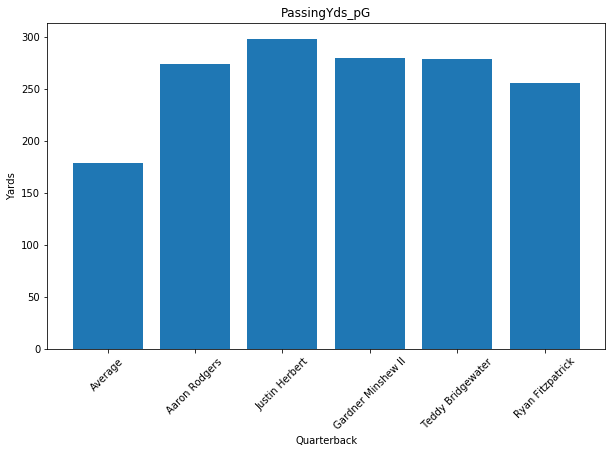

In [59]:
average, rodgers, aaron = print_metric(quarterbacks, 'PassingYds_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassingYds_pG', qb2)
average, minshew, gardner = print_metric(quarterbacks, 'PassingYds_pG', qb3)
average, bridgewater, teddy = print_metric(quarterbacks, 'PassingYds_pG', qb4)
average, fitzpatrick, ryan = print_metric(quarterbacks, 'PassingYds_pG', qb5)

x = ['Average', rodgers, herbert, minshew, bridgewater, fitzpatrick]
y = [average, aaron, justin, gardner, teddy, ryan]

bar_plot(x, y, 'PassingYds_pG', 'Quarterback', 'Yards')

Avg PassesAttempted_pG: 25.2
Aaron Rodgers PassesAttempted_pG: 34.8
--------------------------------------------------
Avg PassesAttempted_pG: 25.2
Justin Herbert PassesAttempted_pG: 35.25
--------------------------------------------------
Avg PassesAttempted_pG: 25.2
Gardner Minshew II PassesAttempted_pG: 40.0
--------------------------------------------------
Avg PassesAttempted_pG: 25.2
Teddy Bridgewater PassesAttempted_pG: 34.33
--------------------------------------------------
Avg PassesAttempted_pG: 25.2
Ryan Fitzpatrick PassesAttempted_pG: 32.83
--------------------------------------------------


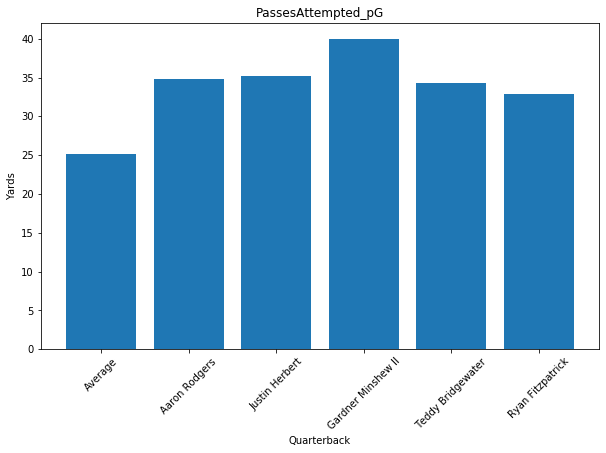

In [60]:
average, rodgers, aaron = print_metric(quarterbacks, 'PassesAttempted_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassesAttempted_pG', qb2)
average, minshew, gardner = print_metric(quarterbacks, 'PassesAttempted_pG', qb3)
average, bridgewater, teddy = print_metric(quarterbacks, 'PassesAttempted_pG', qb4)
average, fitzpatrick, ryan = print_metric(quarterbacks, 'PassesAttempted_pG', qb5)

x = ['Average', rodgers, herbert, minshew, bridgewater, fitzpatrick]
y = [average, aaron, justin, gardner, teddy, ryan]

bar_plot(x, y, 'PassesAttempted_pG', 'Quarterback', 'Yards')

Avg Completion_Percent: 0.64
Aaron Rodgers Completion_Percent: 0.66
--------------------------------------------------
Avg Completion_Percent: 0.64
Justin Herbert Completion_Percent: 0.69
--------------------------------------------------
Avg Completion_Percent: 0.64
Gardner Minshew II Completion_Percent: 0.68
--------------------------------------------------
Avg Completion_Percent: 0.64
Teddy Bridgewater Completion_Percent: 0.71
--------------------------------------------------
Avg Completion_Percent: 0.64
Ryan Fitzpatrick Completion_Percent: 0.7
--------------------------------------------------


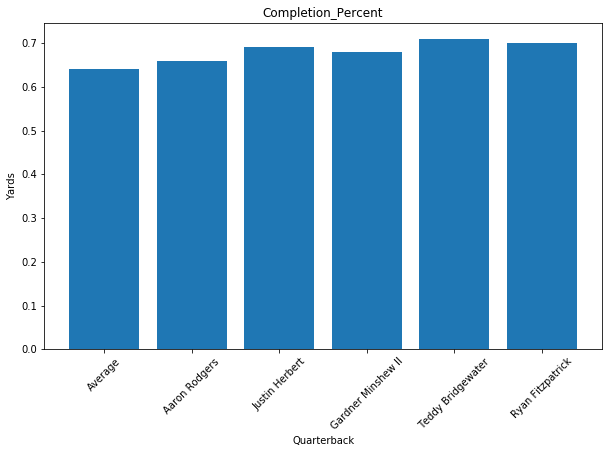

In [61]:
average, rodgers, aaron = print_metric(quarterbacks, 'Completion_Percent', qb1)
average, herbert, justin = print_metric(quarterbacks, 'Completion_Percent', qb2)
average, minshew, gardner = print_metric(quarterbacks, 'Completion_Percent', qb3)
average, bridgewater, teddy = print_metric(quarterbacks, 'Completion_Percent', qb4)
average, fitzpatrick, ryan = print_metric(quarterbacks, 'Completion_Percent', qb5)

x = ['Average', rodgers, herbert, minshew, bridgewater, fitzpatrick]
y = [average, aaron, justin, gardner, teddy, ryan]

bar_plot(x, y, 'Completion_Percent', 'Quarterback', 'Yards')

Avg RushingYds_pG: 11.76
Aaron Rodgers RushingYds_pG: 9.0
--------------------------------------------------
Avg RushingYds_pG: 11.76
Justin Herbert RushingYds_pG: 13.75
--------------------------------------------------
Avg RushingYds_pG: 11.76
Gardner Minshew II RushingYds_pG: 16.83
--------------------------------------------------
Avg RushingYds_pG: 11.76
Teddy Bridgewater RushingYds_pG: 20.17
--------------------------------------------------
Avg RushingYds_pG: 11.76
Ryan Fitzpatrick RushingYds_pG: 22.5
--------------------------------------------------


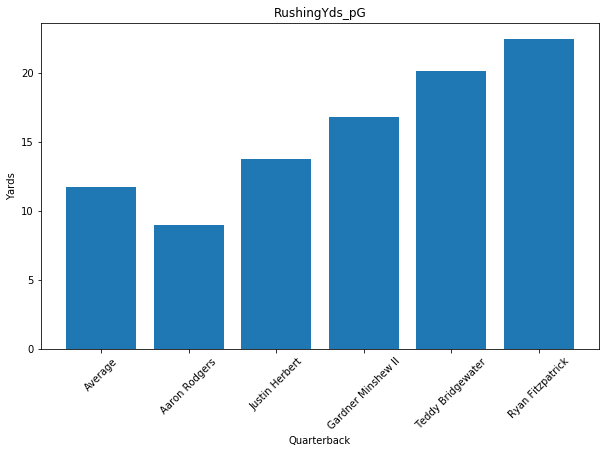

In [62]:
average, rodgers, aaron = print_metric(quarterbacks, 'RushingYds_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'RushingYds_pG', qb2)
average, minshew, gardner = print_metric(quarterbacks, 'RushingYds_pG', qb3)
average, bridgewater, teddy = print_metric(quarterbacks, 'RushingYds_pG', qb4)
average, fitzpatrick, ryan = print_metric(quarterbacks, 'RushingYds_pG', qb5)

x = ['Average', rodgers, herbert, minshew, bridgewater, fitzpatrick]
y = [average, aaron, justin, gardner, teddy, ryan]

bar_plot(x, y, 'RushingYds_pG', 'Quarterback', 'Yards')

Week 7 match ups:
    
    Green Bay vs Houston
    Los Angeles Chargers vs Jacksonville
    Jacksonville vs LA Chargers
    Carolina vs New Orleans

Miami has a bye this week not to mention Fitzpatrick despite being a strong performer this season has just been benched for Tua Tagovailoa in Week 8. I would love to have him on my team but his position is no longer what it was. 

In [63]:
qb_opp = ['Houston Texans', 'Jacksonville Jaguars', 'Los Angeles Chargers', 'New Orleans Saints']

In [64]:
defense[defense['Team'].isin(qb_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
10,Los Angeles Chargers,5,125,336,5.70,1903,123,538,4.40,3,205,6.40,135,10.50,1365,9,17,8,47.10,4,3,1,8,21.00,11.00,1.00,2.00,4.00,3.00,0.00,25.00,380.60,24.60,107.60,41.00,27.00,0.66,273.00,1.60,4.20
18,New Orleans Saints,5,150,325,5.20,1687,141,501,3.60,4,171,6.40,109,11.70,1186,15,20,17,85.00,5,3,2,13,23.00,15.00,4.00,-3.00,4.00,3.00,0.00,30.00,337.40,28.20,100.20,34.20,21.80,0.64,237.20,2.60,4.60
25,Jacksonville Jaguars,6,181,384,6.50,2487,187,863,4.60,8,192,8.20,141,11.70,1624,12,26,16,61.50,6,6,0,5,13.00,6.00,0.00,0.00,2.00,4.00,1.00,30.17,414.50,31.17,143.83,32.00,23.50,0.73,270.67,0.83,2.17
26,Houston Texans,6,182,416,6.10,2538,196,1065,5.40,8,204,6.70,142,11.10,1473,13,28,16,57.10,4,1,3,16,18.00,0.00,4.00,1.00,2.00,9.00,2.00,30.33,423.00,32.67,177.50,34.00,23.67,0.70,245.50,2.67,3.00


In [65]:
def1 = 26
def2 = 25
def3 = 10
def4 = 18
def5 = None

In [66]:
print(quarterbacks['Player'][qb1] + ' vs ' + defense['Team'][def1] + ' Summary:')
print('-' * 50)
print('')

print_metric(quarterbacks, 'PassesAttempted_pG', qb1)
print_metric_team(defense, 'Passing_Att_pG', def1)
print('')
print_metric(quarterbacks, 'CompletedPasses_pG', qb1)
print_metric_team(defense, 'Completions_pG', def1)
print('')
print_metric(quarterbacks, 'PassingYds_pG', qb1)
print_metric_team(defense, 'Passing_Yds_pG', def1)
print('')
print_metric(quarterbacks, 'Completion_Percent', qb1)
print_metric_team(defense, 'Completion_Percent_Allowed', def1)
print('')
print_metric(quarterbacks, 'PassingTDs', qb1)
print_metric_team(defense, 'Passing_TDs', def1)

Aaron Rodgers vs Houston Texans Summary:
--------------------------------------------------

Avg PassesAttempted_pG: 25.2
Aaron Rodgers PassesAttempted_pG: 34.8
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Houston Texans Passing_Att_pG: 34.0
--------------------------------------------------

Avg CompletedPasses_pG: 16.27
Aaron Rodgers CompletedPasses_pG: 22.8
--------------------------------------------------
Avg Completions_pG: 23.14
Houston Texans Completions_pG: 23.67
--------------------------------------------------

Avg PassingYds_pG: 179.51
Aaron Rodgers PassingYds_pG: 274.8
--------------------------------------------------
Avg Passing_Yds_pG: 244.62
Houston Texans Passing_Yds_pG: 245.5
--------------------------------------------------

Avg Completion_Percent: 0.64
Aaron Rodgers Completion_Percent: 0.66
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Houston Texans Completion_Percent_Allowed: 0.7
--------

(9.94, 'Houston Texans', 13)

In [67]:
print(quarterbacks['Player'][qb2] + ' vs ' + defense['Team'][def2] + ' Summary:')
print('-' * 50)
print('')

print_metric(quarterbacks, 'PassesAttempted_pG', qb2)
print_metric_team(defense, 'Passing_Att_pG', def2)
print('')
print_metric(quarterbacks, 'CompletedPasses_pG', qb2)
print_metric_team(defense, 'Completions_pG', def2)
print('')
print_metric(quarterbacks, 'PassingYds_pG', qb2)
print_metric_team(defense, 'Passing_Yds_pG', def2)
print('')
print_metric(quarterbacks, 'Completion_Percent', qb2)
print_metric_team(defense, 'Completion_Percent_Allowed', def2)
print('')
print_metric(quarterbacks, 'PassingTDs', qb2)
print_metric_team(defense, 'Passing_TDs', def2)

Justin Herbert vs Jacksonville Jaguars Summary:
--------------------------------------------------

Avg PassesAttempted_pG: 25.2
Justin Herbert PassesAttempted_pG: 35.25
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Jacksonville Jaguars Passing_Att_pG: 32.0
--------------------------------------------------

Avg CompletedPasses_pG: 16.27
Justin Herbert CompletedPasses_pG: 24.25
--------------------------------------------------
Avg Completions_pG: 23.14
Jacksonville Jaguars Completions_pG: 23.5
--------------------------------------------------

Avg PassingYds_pG: 179.51
Justin Herbert PassingYds_pG: 298.75
--------------------------------------------------
Avg Passing_Yds_pG: 244.62
Jacksonville Jaguars Passing_Yds_pG: 270.67
--------------------------------------------------

Avg Completion_Percent: 0.64
Justin Herbert Completion_Percent: 0.69
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Jacksonville Jaguars Co

(9.94, 'Jacksonville Jaguars', 12)

In [68]:
print(quarterbacks['Player'][qb3] + ' vs ' + defense['Team'][def3] + ' Summary:')
print('-' * 50)
print('')

print_metric(quarterbacks, 'PassesAttempted_pG', qb3)
print_metric_team(defense, 'Passing_Att_pG', def3)
print('')
print_metric(quarterbacks, 'CompletedPasses_pG', qb3)
print_metric_team(defense, 'Completions_pG', def3)
print('')
print_metric(quarterbacks, 'PassingYds_pG', qb3)
print_metric_team(defense, 'Passing_Yds_pG', def3)
print('')
print_metric(quarterbacks, 'Completion_Percent', qb3)
print_metric_team(defense, 'Completion_Percent_Allowed', def3)
print('')
print_metric(quarterbacks, 'PassingTDs', qb3)
print_metric_team(defense, 'Passing_TDs', def3)

Gardner Minshew II vs Los Angeles Chargers Summary:
--------------------------------------------------

Avg PassesAttempted_pG: 25.2
Gardner Minshew II PassesAttempted_pG: 40.0
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Los Angeles Chargers Passing_Att_pG: 41.0
--------------------------------------------------

Avg CompletedPasses_pG: 16.27
Gardner Minshew II CompletedPasses_pG: 27.0
--------------------------------------------------
Avg Completions_pG: 23.14
Los Angeles Chargers Completions_pG: 27.0
--------------------------------------------------

Avg PassingYds_pG: 179.51
Gardner Minshew II PassingYds_pG: 280.33
--------------------------------------------------
Avg Passing_Yds_pG: 244.62
Los Angeles Chargers Passing_Yds_pG: 273.0
--------------------------------------------------

Avg Completion_Percent: 0.64
Gardner Minshew II Completion_Percent: 0.68
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Los An

(9.94, 'Los Angeles Chargers', 9)

In [69]:
print(quarterbacks['Player'][qb4] + ' vs ' + defense['Team'][def4] + ' Summary:')
print('-' * 50)
print('')

print_metric(quarterbacks, 'PassesAttempted_pG', qb4)
print_metric_team(defense, 'Passing_Att_pG', def4)
print('')
print_metric(quarterbacks, 'CompletedPasses_pG', qb4)
print_metric_team(defense, 'Completions_pG', def4)
print('')
print_metric(quarterbacks, 'PassingYds_pG', qb4)
print_metric_team(defense, 'Passing_Yds_pG', def4)
print('')
print_metric(quarterbacks, 'Completion_Percent', qb4)
print_metric_team(defense, 'Completion_Percent_Allowed', def4)
print('')
print_metric(quarterbacks, 'PassingTDs', qb4)
print_metric_team(defense, 'Passing_TDs', def4)

Teddy Bridgewater vs New Orleans Saints Summary:
--------------------------------------------------

Avg PassesAttempted_pG: 25.2
Teddy Bridgewater PassesAttempted_pG: 34.33
--------------------------------------------------
Avg Passing_Att_pG: 35.35
New Orleans Saints Passing_Att_pG: 34.2
--------------------------------------------------

Avg CompletedPasses_pG: 16.27
Teddy Bridgewater CompletedPasses_pG: 24.33
--------------------------------------------------
Avg Completions_pG: 23.14
New Orleans Saints Completions_pG: 21.8
--------------------------------------------------

Avg PassingYds_pG: 179.51
Teddy Bridgewater PassingYds_pG: 279.33
--------------------------------------------------
Avg Passing_Yds_pG: 244.62
New Orleans Saints Passing_Yds_pG: 237.2
--------------------------------------------------

Avg Completion_Percent: 0.64
Teddy Bridgewater Completion_Percent: 0.71
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
New Orleans Saint

(9.94, 'New Orleans Saints', 15)

So the most interesting thing comes down to Herbert and Minshew who will be going head to head this week. While quarterbacks have taken fewer attempts in the air against the Jaguars, they have had more success completing passes than those playing the Chargers. I want to flip Minshew for rookie Herbert this week.

## Runningbacks

In [70]:
runningbacks = offense[offense['Position'] == 'RB']

In [71]:
per_week_stats(runningbacks, 'RushingAttempts', 'Games')
per_week_stats(runningbacks, 'RushingYds', 'Games')
per_week_stats(runningbacks, 'Targeted', 'Games')
per_week_stats(runningbacks, 'Receptions', 'Games')
per_week_stats(runningbacks, 'LostFumbles', 'Games')

In [72]:
runningbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,LostFumbles_pG
0,Alvin Kamara,NOR,RB,25,5,4,0,0,0,0,0,61,281,10.10,4,45,38,395,13.90,3,0,0,7,0,0,128.60,1,1,109.60,18.70,29.40,31.70,17.90,11.90,0.00,12.20,56.20,9.00,7.60,0.00
1,Derrick Henry,TEN,RB,26,5,5,0,0,0,0,0,123,588,11.80,6,15,8,84,15.00,0,0,0,6,0,0,107.20,2,2,103.20,13.10,8.40,25.00,0.00,18.30,38.40,24.60,117.60,3.00,1.60,0.00
4,Dalvin Cook,MIN,RB,25,5,5,0,0,0,0,0,92,489,8.20,7,16,12,64,8.30,0,1,1,7,3,0,107.30,3,5,101.30,20.80,15.10,23.90,26.60,14.90,0.00,18.40,97.80,3.20,2.40,0.20
6,Aaron Jones,GNB,RB,26,5,5,0,0,0,0,0,75,389,6.90,5,28,18,161,17.40,2,1,0,7,0,0,106.00,4,7,97.00,13.60,41.60,14.60,17.10,0.00,10.10,15.00,77.80,5.60,3.60,0.00
10,Ezekiel Elliott,DAL,RB,25,6,6,0,0,0,0,0,101,413,4.90,5,42,32,204,9.80,1,5,4,6,1,0,107.70,5,11,91.70,24.70,16.20,11.80,12.50,22.50,4.00,16.83,68.83,7.00,5.33,0.67


In [73]:
runningbacks[runningbacks['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,LostFumbles_pG
1,Derrick Henry,TEN,RB,26,5,5,0,0,0,0,0,123,588,11.80,6,15,8,84,15.00,0,0,0,6,0,0,107.20,2,2,103.20,13.10,8.40,25.00,0.00,18.30,38.40,24.60,117.60,3.00,1.60,0.00
20,Chris Carson,SEA,RB,26,5,5,0,0,0,0,0,61,289,11.40,3,23,21,140,12.70,3,1,0,6,0,0,89.40,8,21,78.90,18.60,16.80,7.60,22.00,13.90,0.00,12.20,57.80,4.60,4.20,0.00
47,Darrell Henderson,LAR,RB,23,6,4,0,0,0,0,0,72,348,12.30,3,11,7,96,20.10,1,0,0,4,0,0,71.90,19,48,68.40,0.60,18.10,18.00,3.80,18.80,9.20,12.00,58.00,1.83,1.17,0.00
250,Damien Harris,NWE,RB,23,2,2,0,0,0,0,0,23,119,6.70,0,1,1,14,14.00,0,0,0,0,0,0,13.80,71,,13.30,0.00,0.00,0.00,10.00,0.00,3.30,11.50,59.50,0.50,0.50,0.00


In [74]:
available_rbs = runningbacks[~runningbacks['Player'].isin(taken_wrt)]

In [ ]:
scaled_rbs = available_rbs[['Player', 'Team', 'Position', '']]

In [94]:
rb1 = 1
rb2 = 20
rb3 = 47
rb4 = 250

Avg RushingAttempts_pG: 4.22
Derrick Henry RushingAttempts_pG: 24.6
--------------------------------------------------
Avg RushingAttempts_pG: 4.22
Chris Carson RushingAttempts_pG: 12.2
--------------------------------------------------
Avg RushingAttempts_pG: 4.22
Darrell Henderson RushingAttempts_pG: 12.0
--------------------------------------------------
Avg RushingAttempts_pG: 4.22
Damien Harris RushingAttempts_pG: 11.5
--------------------------------------------------


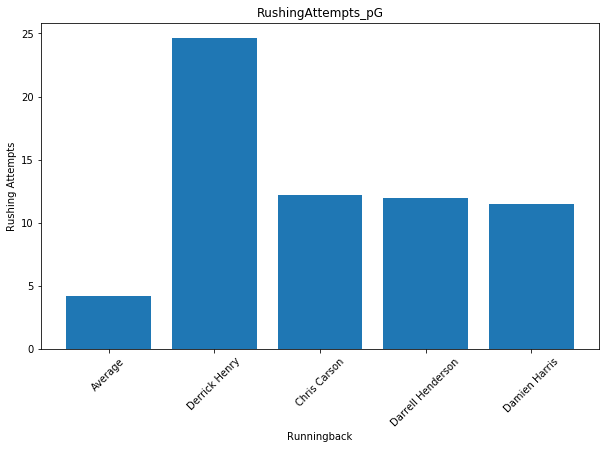

In [95]:
average, henry, derrick = print_metric(available_rbs, 'RushingAttempts_pG', rb1)
average, carson, chris = print_metric(available_rbs, 'RushingAttempts_pG', rb2)
average, henderson, darrell = print_metric(available_rbs, 'RushingAttempts_pG', rb3)
average, harris, damien = print_metric(available_rbs, 'RushingAttempts_pG', rb4)

x = ['Average', henry, carson, henderson, harris]
y = [average, derrick, chris, darrell, damien]

bar_plot(x, y, 'RushingAttempts_pG', 'Runningback', 'Rushing Attempts')

Avg RushingYds_pG: 17.72
Derrick Henry RushingYds_pG: 117.6
--------------------------------------------------
Avg RushingYds_pG: 17.72
Chris Carson RushingYds_pG: 57.8
--------------------------------------------------
Avg RushingYds_pG: 17.72
Darrell Henderson RushingYds_pG: 58.0
--------------------------------------------------
Avg RushingYds_pG: 17.72
Damien Harris RushingYds_pG: 59.5
--------------------------------------------------


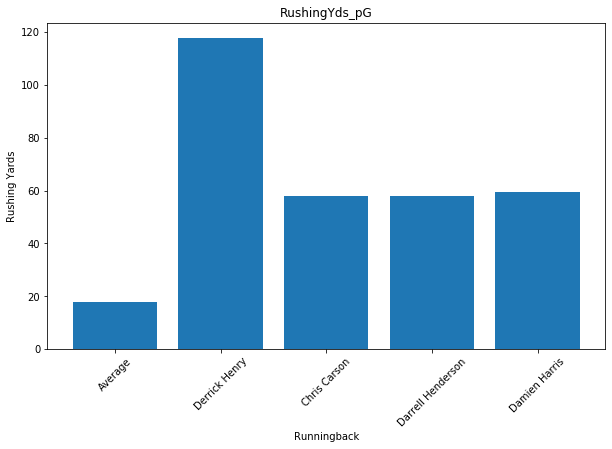

In [96]:
average, henry, derrick = print_metric(available_rbs, 'RushingYds_pG', rb1)
average, carson, chris = print_metric(available_rbs, 'RushingYds_pG', rb2)
average, henderson, darrell = print_metric(available_rbs, 'RushingYds_pG', rb3)
average, harris, damien = print_metric(available_rbs, 'RushingYds_pG', rb4)

x = ['Average', henry, carson, henderson, harris]
y = [average, derrick, chris, darrell, damien]

bar_plot(x, y, 'RushingYds_pG', 'Runningback', 'Rushing Yards')

Avg Targeted_pG: 1.47
Derrick Henry Targeted_pG: 3.0
--------------------------------------------------
Avg Targeted_pG: 1.47
Chris Carson Targeted_pG: 4.6
--------------------------------------------------
Avg Targeted_pG: 1.47
Darrell Henderson Targeted_pG: 1.83
--------------------------------------------------
Avg Targeted_pG: 1.47
Damien Harris Targeted_pG: 0.5
--------------------------------------------------


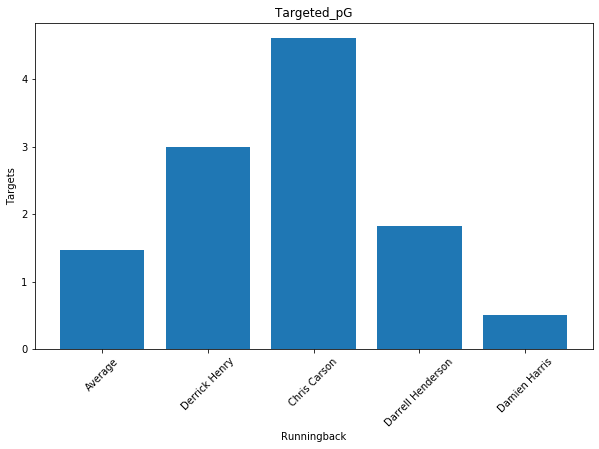

In [97]:
average, henry, derrick = print_metric(available_rbs, 'Targeted_pG', rb1)
average, carson, chris = print_metric(available_rbs, 'Targeted_pG', rb2)
average, henderson, darrell = print_metric(available_rbs, 'Targeted_pG', rb3)
average, harris, damien = print_metric(available_rbs, 'Targeted_pG', rb4)

x = ['Average', henry, carson, henderson, harris]
y = [average, derrick, chris, darrell, damien]

bar_plot(x, y, 'Targeted_pG', 'Runningback', 'Targets')

Avg Receptions_pG: 1.14
Derrick Henry Receptions_pG: 1.6
--------------------------------------------------
Avg Receptions_pG: 1.14
Chris Carson Receptions_pG: 4.2
--------------------------------------------------
Avg Receptions_pG: 1.14
Darrell Henderson Receptions_pG: 1.17
--------------------------------------------------
Avg Receptions_pG: 1.14
Damien Harris Receptions_pG: 0.5
--------------------------------------------------


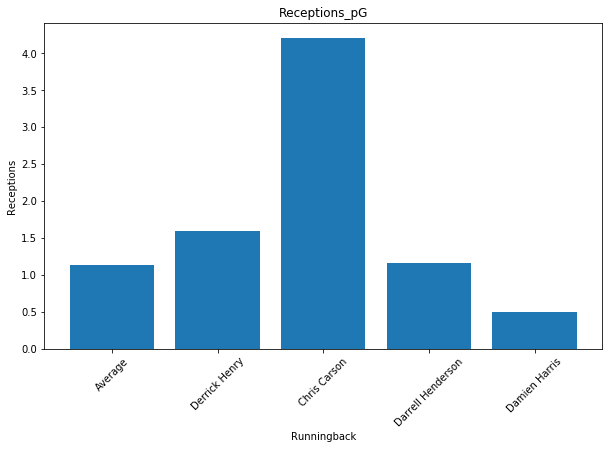

In [98]:
average, henry, derrick = print_metric(available_rbs, 'Receptions_pG', rb1)
average, carson, chris = print_metric(available_rbs, 'Receptions_pG', rb2)
average, henderson, darrell = print_metric(available_rbs, 'Receptions_pG', rb3)
average, harris, damien = print_metric(available_rbs, 'Receptions_pG', rb4)

x = ['Average', henry, carson, henderson, harris]
y = [average, derrick, chris, darrell, damien]

bar_plot(x, y, 'Receptions_pG', 'Runningback', 'Receptions')

In [99]:
top_availRBs = available_rbs[(available_rbs['RushingAttempts_pG'] > available_rbs['RushingAttempts_pG'].mean()*1.5) & (available_rbs['RushingYds_pG'] > available_rbs['RushingYds_pG'].mean()*1.5)] 
top_availRBs = top_availRBs[~top_availRBs['Player'].isin(myteam_wrt)]
top_availRBs.sort_values('RushingYds_pG', ascending=False, inplace=True)
top_availRBs

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG
245,Phillip Lindsay,DEN,RB,26,2,2,0,0,0,0,0,30,125,5.70,0,1,1,11,11.00,0,0,0,0,0,0,14.10,69,,13.60,3.50,0.00,0.00,0.00,0.00,10.10,15.00,62.50,0.50,0.50
107,Austin Ekeler,LAC,RB,25,4,4,0,0,0,0,0,49,248,5.60,1,17,17,144,12.70,0,0,0,1,0,0,53.70,32,,45.20,8.70,14.80,20.30,1.40,0.00,0.00,12.25,62.00,4.25,4.25
179,Sony Michel,NWE,RB,25,3,3,0,0,0,0,0,26,173,12.50,1,3,2,23,16.00,0,0,0,1,0,0,26.60,49,,25.60,9.70,1.90,14.00,0.00,0.00,0.00,8.67,57.67,1.00,0.67
108,Adrian Peterson,DET,RB,35,5,3,0,0,0,0,0,69,285,5.30,2,7,5,49,17.00,0,0,0,2,0,0,47.90,31,,45.40,11.40,4.10,8.50,9.60,0.00,11.80,13.80,57.00,1.40,1.00
68,Myles Gaskin,MIA,RB,23,6,4,0,0,0,0,0,82,340,5.50,1,29,27,182,13.40,0,0,0,1,0,0,71.70,22,69,58.20,6.60,8.20,9.50,6.20,15.10,12.60,13.67,56.67,4.83,4.50
118,Latavius Murray,NOR,RB,30,5,2,0,0,0,0,0,52,218,5.90,2,8,6,68,14.30,0,0,0,2,0,0,43.60,35,,40.60,4.80,3.30,6.50,20.30,5.70,0.00,10.40,43.60,1.60,1.20
160,Frank Gore,NYJ,RB,37,6,5,0,0,0,0,0,75,250,6.30,0,9,6,35,13.30,0,0,0,0,0,0,31.50,42,,28.50,2.40,6.30,6.20,3.60,3.00,7.00,12.50,41.67,1.50,1.00
164,Devonta Freeman,NYG,RB,28,4,3,0,0,0,0,0,51,164,5.20,1,9,7,58,10.90,0,0,0,1,0,0,31.70,43,,28.20,0.00,0.00,1.00,6.80,14.70,5.70,12.75,41.00,2.25,1.75
128,Alexander Mattison,MIN,RB,22,6,1,0,0,0,0,0,54,245,9.40,1,11,9,61,13.80,0,0,0,1,0,0,41.10,38,,36.60,8.00,1.60,2.70,7.70,13.60,3.00,9.00,40.83,1.83,1.50
146,Joshua Kelley,LAC,RB,23,5,0,0,0,0,0,0,63,203,5.20,1,8,8,93,17.30,0,2,2,1,0,0,35.60,41,,31.60,12.00,11.30,3.20,1.30,3.80,0.00,12.60,40.60,1.60,1.60


Looking at my RBs, I'm not really interested in trading for someone else. Harris was inconsistent last week, but his first week in he was great. I'm not ready to make any changes.

Henry is coming off his biggest week so he's in. Chris Carson is a great RB and gets targeted pretty regularly.

In [100]:
# rb_opp = ['Houston Texans', 'Denver Broncos', 'San Francisco 49ers']

In [101]:
# defense[defense['Team'].isin(rb_opp)]

In [102]:
# teamRB1 = 20
# teamRB2 = None
# teamRB3 = 13
# teamRB4 = 6

In [103]:
# print(runningbacks['Player'][rb1] + ' vs ' + defense['Team'][teamRB1] + ' Summary:')
# print('-' * 50)
# print('')


# print_metric(runningbacks, 'RushingAttempts_pG', rb1)
# print_metric_team(defense, 'Rushing_Att_pG', teamRB1)
# print('')
# print_metric(runningbacks, 'RushingYds_pG', rb1)
# print_metric_team(defense, 'Rushing_Yds_pG', teamRB1)

In [104]:
# print(runningbacks['Player'][rb2] + ' vs ' + defense['Team'][teamRB2] + ' Summary:')
# print('-' * 50)
# print('')


# print_metric(runningbacks, 'RushingAttempts_pG', rb2)
# print_metric_team(defense, 'Rushing_Att_pG', teamRB2)
# print('')
# print_metric(runningbacks, 'RushingYds_pG', rb2)
# print_metric_team(defense, 'Rushing_Yds_pG', teamRB2)

In [105]:
# print(runningbacks['Player'][rb3] + ' vs ' + defense['Team'][teamRB3] + ' Summary:')
# print('-' * 50)
# print('')


# print_metric(runningbacks, 'RushingAttempts_pG', rb3)
# print_metric_team(defense, 'Rushing_Att_pG', teamRB3)
# print('')
# print_metric(runningbacks, 'RushingYds_pG', rb3)
# print_metric_team(defense, 'Rushing_Yds_pG', teamRB3)

In [106]:
# print(runningbacks['Player'][rb4] + ' vs ' + defense['Team'][teamRB4] + ' Summary:')
# print('-' * 50)
# print('')


# print_metric(runningbacks, 'RushingAttempts_pG', rb4)
# print_metric_team(defense, 'Rushing_Att_pG', teamRB4)
# print('')
# print_metric(runningbacks, 'RushingYds_pG', rb4)
# print_metric_team(defense, 'Rushing_Yds_pG', teamRB4)


## Tight End

In [107]:
tight_ends = offense[offense['Position'] == 'TE']

In [108]:
per_week_stats(tight_ends, 'Targeted', 'Games')
per_week_stats(tight_ends, 'Receptions', 'Games')
per_week_stats(tight_ends, 'ReceivingYds', 'Games')
per_week_stats(tight_ends, 'ReceivingTDs', 'Games')

In [109]:
tight_ends.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG
9,Travis Kelce,KAN,TE,31,6,6,0,0,0,0,0,0,0,0.00,0,53,37,470,19.00,5,1,1,5,0,0,93.50,1,10,75.00,11.00,15.00,8.70,7.00,16.80,16.50,8.83,6.17,78.33,0.83
36,Mark Andrews,BAL,TE,24,6,1,0,0,0,0,0,0,0,0.00,0,33,20,243,13.50,5,1,0,5,0,0,64.30,2,37,54.30,17.80,2.90,2.20,17.70,11.60,2.10,5.50,3.33,40.50,0.83
37,Jonnu Smith,TEN,TE,25,5,5,0,0,0,0,0,0,0,0.00,0,29,19,234,15.20,5,0,0,5,0,0,62.90,3,38,53.40,9.60,20.40,6.10,0.00,16.00,1.30,5.80,3.80,46.80,1.00
39,George Kittle,SFO,TE,27,4,4,0,0,0,0,0,2,17,13.00,0,38,30,380,18.70,2,0,0,2,0,0,66.70,4,40,51.70,5.30,0.00,0.00,25.10,4.40,16.90,9.50,7.50,95.00,0.50
46,Robert Tonyan,GNB,TE,26,5,4,0,0,0,0,0,0,0,0.00,0,18,16,198,15.80,5,0,0,5,0,0,57.80,5,47,49.80,0.00,8.50,11.00,27.80,0.00,2.50,3.60,3.20,39.60,1.00


In [110]:
tight_ends[tight_ends['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG
37,Jonnu Smith,TEN,TE,25,5,5,0,0,0,0,0,0,0,0.00,0,29,19,234,15.20,5,0,0,5,0,0,62.90,3,38,53.40,9.60,20.40,6.10,0.00,16.00,1.30,5.80,3.80,46.80,1.00
131,Dalton Schultz,DAL,TE,24,6,4,0,0,0,0,0,0,0,0.00,0,36,23,260,14.00,2,1,1,2,0,0,47.50,13,,36.00,1.10,12.80,4.80,13.20,0.60,3.50,6.00,3.83,43.33,0.33


In [114]:
available_te = tight_ends[~tight_ends['Player'].isin(taken_wrt)]
available_te.sort_values('YdspReception', ascending = False, inplace = True)
available_te.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG
355,Albert Okwuegbunam,DEN,TE,22,1,0,0,0,0,0,0,0,0,0.00,0,6,2,45,27.00,0,0,0,0,0,0,5.50,68,,4.50,0.00,0.00,0.00,0.00,0.00,4.50,6.00,2.00,45.00,0.00
149,Mo Alie-Cox,IND,TE,27,5,2,0,0,0,0,0,0,0,0.00,0,14,11,194,23.40,2,0,0,2,0,0,36.90,16,,31.40,2.00,11.10,11.00,7.30,0.00,0.00,2.80,2.20,38.80,0.40
249,Jack Doyle,IND,TE,30,5,5,0,0,0,0,0,0,0,0.00,0,10,7,90,20.60,1,1,1,1,0,0,16.50,40,,13.00,4.90,0.00,0.00,1.20,0.00,6.90,2.00,1.40,18.00,0.20
74,Darren Fells,HOU,TE,34,6,6,0,0,0,0,0,0,0,0.00,0,19,14,205,20.40,3,0,0,3,0,0,45.50,12,75,38.50,1.90,8.30,0.00,2.10,11.70,14.50,3.17,2.33,34.17,0.50
165,Rob Gronkowski,TAM,TE,31,6,6,0,0,0,0,0,0,0,0.00,0,28,17,218,20.20,1,0,0,1,0,0,36.30,18,,27.80,1.10,0.00,4.80,2.90,5.20,13.80,4.67,2.83,36.33,0.17


In [115]:
te1 = 37
te2 = 131
te3 = 53
te4 = 165

Avg Targeted_pG: 2.17
Jonnu Smith Targeted_pG: 5.8
--------------------------------------------------
Avg Targeted_pG: 2.17
Dalton Schultz Targeted_pG: 6.0
--------------------------------------------------
Avg Targeted_pG: 2.17
Jimmy Graham Targeted_pG: 6.0
--------------------------------------------------
Avg Targeted_pG: 2.17
Rob Gronkowski Targeted_pG: 4.67
--------------------------------------------------


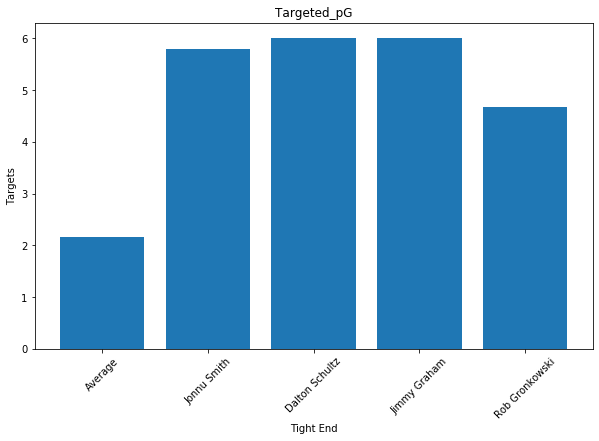

In [116]:
average, smith, jonnu = print_metric(available_te, 'Targeted_pG', te1)
average, schultz, dalton = print_metric(available_te, 'Targeted_pG', te2)
average, graham, jimmy = print_metric(available_te, 'Targeted_pG', te3)
average, gronkowski, rob = print_metric(available_te, 'Targeted_pG', te4)

x = ['Average', smith, schultz, graham, gronkowski]
y = [average, jonnu, dalton, jimmy, rob]

bar_plot(x, y, 'Targeted_pG', 'Tight End', 'Targets')

Avg Receptions_pG: 1.47
Jonnu Smith Receptions_pG: 3.8
--------------------------------------------------
Avg Receptions_pG: 1.47
Dalton Schultz Receptions_pG: 3.83
--------------------------------------------------
Avg Receptions_pG: 1.47
Jimmy Graham Receptions_pG: 3.67
--------------------------------------------------
Avg Receptions_pG: 1.47
Rob Gronkowski Receptions_pG: 2.83
--------------------------------------------------


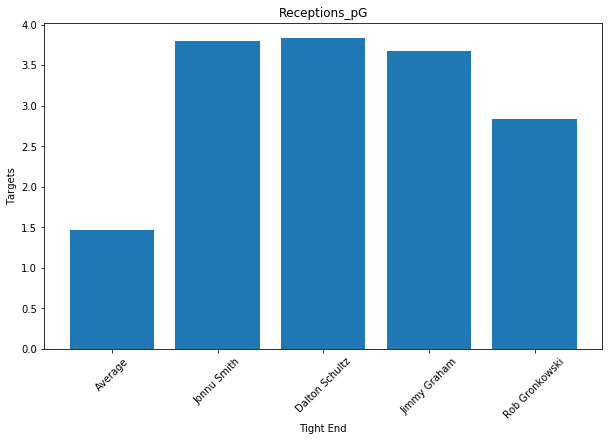

In [117]:
average, smith, jonnu = print_metric(available_te, 'Receptions_pG', te1)
average, schultz, dalton = print_metric(available_te, 'Receptions_pG', te2)
average, graham, jimmy = print_metric(available_te, 'Receptions_pG', te3)
average, gronkowski, rob = print_metric(available_te, 'Receptions_pG', te4)

x = ['Average', smith, schultz, graham, gronkowski]
y = [average, jonnu, dalton, jimmy, rob]

bar_plot(x, y, 'Receptions_pG', 'Tight End', 'Targets')

Avg ReceivingYds_pG: 15.48
Jonnu Smith ReceivingYds_pG: 46.8
--------------------------------------------------
Avg ReceivingYds_pG: 15.48
Dalton Schultz ReceivingYds_pG: 43.33
--------------------------------------------------
Avg ReceivingYds_pG: 15.48
Jimmy Graham ReceivingYds_pG: 33.83
--------------------------------------------------
Avg ReceivingYds_pG: 15.48
Rob Gronkowski ReceivingYds_pG: 36.33
--------------------------------------------------


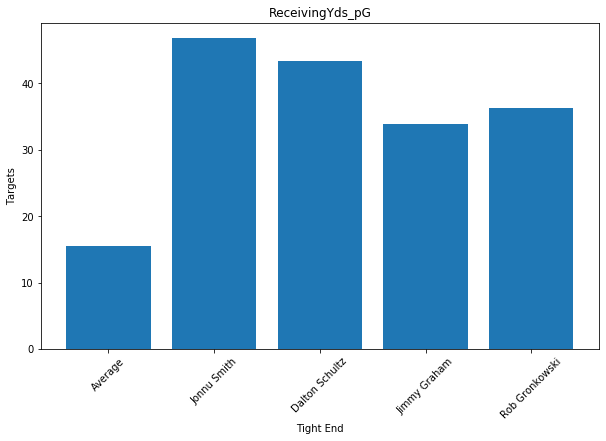

In [118]:
average, smith, jonnu = print_metric(available_te, 'ReceivingYds_pG', te1)
average, schultz, dalton = print_metric(available_te, 'ReceivingYds_pG', te2)
average, graham, jimmy = print_metric(available_te, 'ReceivingYds_pG', te3)
average, gronkowski, rob = print_metric(available_te, 'ReceivingYds_pG', te4)

x = ['Average', smith, schultz, graham, gronkowski]
y = [average, jonnu, dalton, jimmy, rob]

bar_plot(x, y, 'ReceivingYds_pG', 'Tight End', 'Targets')

In [122]:
te_opp = {'Tennessee Titans': 'Pittsburgh Steelers',
          'Dallas Cowboys': 'Washington Football Team',
          'Chicago Bears': 'Los Angeles Rams', 
          'Tampa Bay Buccaneers': 'Las Vegas Raiders'}

In [123]:
defense[defense['Team'].isin(te_opp.values())]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
0,Pittsburgh Steelers,5,94,294,4.90,1426,99,331,3.30,3,171,5.60,100,12.60,1095,9,13,8,61.50,9,8,1,24,54.00,8.00,13.00,7.00,10.00,8.00,18.00,18.80,285.20,19.80,66.20,34.20,20.00,0.58,219.00,4.80,10.80
6,Los Angeles Rams,6,114,384,5.00,1911,150,654,4.40,5,214,5.40,139,10.00,1257,8,19,12,63.20,6,4,2,20,38.00,4.00,7.00,4.00,11.00,12.00,0.00,19.00,318.50,25.00,109.00,35.67,23.17,0.65,209.50,3.33,6.33
19,Las Vegas Raiders,5,152,315,6.20,1968,131,634,4.80,10,177,7.30,111,12.40,1334,7,22,15,68.20,3,3,0,7,9.00,0.00,2.00,3.00,0.00,4.00,0.00,30.40,393.60,26.20,126.80,35.40,22.20,0.63,266.80,1.40,1.80
22,Washington Football Team,6,162,370,5.50,2022,179,780,4.40,8,175,6.50,114,11.80,1242,10,20,11,55.00,8,7,1,16,30.00,15.00,4.00,1.00,4.00,2.00,4.00,27.00,337.00,29.83,130.00,29.17,19.00,0.65,207.00,2.67,5.00


In [124]:
teamTE1 = 0
teamTE2 = 22
teamTE3 = 6
teamTE4 = 19

In [125]:
print(tight_ends['Player'][te1] + ' vs ' + defense['Team'][teamTE1] + ' Summary:')
print('-' * 50)
print('')


print_metric(tight_ends, 'Targeted_pG', te1)
print_metric_team(defense, 'Passing_Att_pG', teamTE1)
print('')
print_metric(tight_ends, 'Receptions_pG', te1)
print_metric_team(defense, 'Completions_pG', teamTE1)
print('')
print_metric(tight_ends, 'ReceivingYds_pG', te1)
print_metric_team(defense, 'Passing_Yds_pG', teamTE1)

Jonnu Smith vs Pittsburgh Steelers Summary:
--------------------------------------------------

Avg Targeted_pG: 2.76
Jonnu Smith Targeted_pG: 5.8
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Pittsburgh Steelers Passing_Att_pG: 34.2
--------------------------------------------------

Avg Receptions_pG: 1.86
Jonnu Smith Receptions_pG: 3.8
--------------------------------------------------
Avg Completions_pG: 23.14
Pittsburgh Steelers Completions_pG: 20.0
--------------------------------------------------

Avg ReceivingYds_pG: 20.23
Jonnu Smith ReceivingYds_pG: 46.8
--------------------------------------------------
Avg Passing_Yds_pG: 244.62
Pittsburgh Steelers Passing_Yds_pG: 219.0
--------------------------------------------------


(244.62, 'Pittsburgh Steelers', 219.0)

In [126]:
print(tight_ends['Player'][te2] + ' vs ' + defense['Team'][teamTE2] + ' Summary:')
print('-' * 50)
print('')


print_metric(tight_ends, 'Targeted_pG', te2)
print_metric_team(defense, 'Passing_Att_pG', teamTE2)
print('')
print_metric(tight_ends, 'Receptions_pG', te2)
print_metric_team(defense, 'Completions_pG', teamTE2)
print('')
print_metric(tight_ends, 'ReceivingYds_pG', te2)
print_metric_team(defense, 'Passing_Yds_pG', teamTE2)

Dalton Schultz vs Washington Football Team Summary:
--------------------------------------------------

Avg Targeted_pG: 2.76
Dalton Schultz Targeted_pG: 6.0
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Washington Football Team Passing_Att_pG: 29.17
--------------------------------------------------

Avg Receptions_pG: 1.86
Dalton Schultz Receptions_pG: 3.83
--------------------------------------------------
Avg Completions_pG: 23.14
Washington Football Team Completions_pG: 19.0
--------------------------------------------------

Avg ReceivingYds_pG: 20.23
Dalton Schultz ReceivingYds_pG: 43.33
--------------------------------------------------
Avg Passing_Yds_pG: 244.62
Washington Football Team Passing_Yds_pG: 207.0
--------------------------------------------------


(244.62, 'Washington Football Team', 207.0)

In [127]:
print(tight_ends['Player'][te3] + ' vs ' + defense['Team'][teamTE3] + ' Summary:')
print('-' * 50)
print('')


print_metric(tight_ends, 'Targeted_pG', te3)
print_metric_team(defense, 'Passing_Att_pG', teamTE3)
print('')
print_metric(tight_ends, 'Receptions_pG', te3)
print_metric_team(defense, 'Completions_pG', teamTE3)
print('')
print_metric(tight_ends, 'ReceivingYds_pG', te3)
print_metric_team(defense, 'Passing_Yds_pG', teamTE3)

Jimmy Graham vs Los Angeles Rams Summary:
--------------------------------------------------

Avg Targeted_pG: 2.76
Jimmy Graham Targeted_pG: 6.0
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Los Angeles Rams Passing_Att_pG: 35.67
--------------------------------------------------

Avg Receptions_pG: 1.86
Jimmy Graham Receptions_pG: 3.67
--------------------------------------------------
Avg Completions_pG: 23.14
Los Angeles Rams Completions_pG: 23.17
--------------------------------------------------

Avg ReceivingYds_pG: 20.23
Jimmy Graham ReceivingYds_pG: 33.83
--------------------------------------------------
Avg Passing_Yds_pG: 244.62
Los Angeles Rams Passing_Yds_pG: 209.5
--------------------------------------------------


(244.62, 'Los Angeles Rams', 209.5)

In [128]:
print(tight_ends['Player'][te4] + ' vs ' + defense['Team'][teamTE4] + ' Summary:')
print('-' * 50)
print('')


print_metric(tight_ends, 'Targeted_pG', te4)
print_metric_team(defense, 'Passing_Att_pG', teamTE4)
print('')
print_metric(tight_ends, 'Receptions_pG', te4)
print_metric_team(defense, 'Completions_pG', teamTE4)
print('')
print_metric(tight_ends, 'ReceivingYds_pG', te4)
print_metric_team(defense, 'Passing_Yds_pG', teamTE4)

Rob Gronkowski vs Las Vegas Raiders Summary:
--------------------------------------------------

Avg Targeted_pG: 2.76
Rob Gronkowski Targeted_pG: 4.67
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Las Vegas Raiders Passing_Att_pG: 35.4
--------------------------------------------------

Avg Receptions_pG: 1.86
Rob Gronkowski Receptions_pG: 2.83
--------------------------------------------------
Avg Completions_pG: 23.14
Las Vegas Raiders Completions_pG: 22.2
--------------------------------------------------

Avg ReceivingYds_pG: 20.23
Rob Gronkowski ReceivingYds_pG: 36.33
--------------------------------------------------
Avg Passing_Yds_pG: 244.62
Las Vegas Raiders Passing_Yds_pG: 266.8
--------------------------------------------------


(244.62, 'Las Vegas Raiders', 266.8)



## Wide Receiver

In [202]:
wrs = offense[offense['Position'] == 'WR']

In [203]:
per_week_stats(wrs, 'Targeted', 'Games')
per_week_stats(wrs, 'Receptions', 'Games')
wrs['Catch_Rate'] = wrs['Receptions_pG']/wrs['Targeted_pG']
per_week_stats(wrs, 'ReceivingYds', 'Games')
per_week_stats(wrs, 'ReceivingTDs', 'Games')

In [204]:
wrs[wrs['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG
17,DeAndre Hopkins,ARI,WR,28,5,5,0,0,0,0,0,0,0,0.00,0,53,45,528,18.30,2,0,0,2,0,0,87.30,5,18,64.80,15.10,12.80,13.70,4.10,19.10,10.60,9.00,0.85,105.60,0.40
29,Robby Anderson,CAR,WR,27,5,5,0,0,0,0,0,1,3,3.00,0,46,36,489,18.80,1,1,1,1,1,0,73.20,12,30,55.30,19.50,8.90,5.50,9.90,11.50,9.20,7.20,0.78,97.80,0.20
51,Jamison Crowder,NYJ,WR,27,3,3,0,0,0,0,0,0,0,0.00,0,33,22,335,17.30,2,0,0,2,0,0,56.50,21,52,45.50,17.50,0.00,0.00,10.40,17.60,11.00,7.33,0.67,111.67,0.67
177,Julio Jones,ATL,WR,31,3,3,0,0,0,0,0,0,0,0.00,0,20,15,213,16.00,0,0,0,0,0,0,28.80,73,,21.30,15.70,2.40,0.00,3.20,0.00,6.67,5.00,0.75,71.00,0.00
183,Diontae Johnson,PIT,WR,24,4,4,0,0,0,0,0,1,9,9.00,0,26,15,147,17.00,1,1,1,1,0,0,27.10,78,,19.60,3.70,15.20,0.90,0.00,0.20,6.50,3.75,0.58,36.75,0.25


In [205]:
available_wrs = wrs[~wrs['Player'].isin(taken_wrt)]
top_wrs = available_wrs[(available_wrs['ReceivingYds_pG'] > available_wrs['ReceivingYds_pG'].mean()*1.5) & (available_wrs['Targeted_pG'] > available_wrs['Targeted_pG'].mean()*1.5)]
top_wrs.sort_values('ReceivingYds_pG', ascending = False, inplace = True)
top_wrs

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG
51,Jamison Crowder,NYJ,WR,27,3,3,0,0,0,0,0,0,0,0.00,0,33,22,335,17.30,2,0,0,2,0,0,56.50,21,52,45.50,17.50,0.00,0.00,10.40,17.60,11.00,7.33,0.67,111.67,0.67
17,DeAndre Hopkins,ARI,WR,28,5,5,0,0,0,0,0,0,0,0.00,0,53,45,528,18.30,2,0,0,2,0,0,87.30,5,18,64.80,15.10,12.80,13.70,4.10,19.10,10.60,9.00,0.85,105.60,0.40
120,Travis Fulgham,PHI,WR,25,2,2,0,0,0,0,0,0,0,0.00,0,16,12,209,21.20,2,0,0,2,0,0,38.90,43,,32.90,0.00,0.00,0.00,11.70,21.20,8.00,6.00,0.75,104.50,1.00
29,Robby Anderson,CAR,WR,27,5,5,0,0,0,0,0,1,3,3.00,0,46,36,489,18.80,1,1,1,1,1,0,73.20,12,30,55.30,19.50,8.90,5.50,9.90,11.50,9.20,7.20,0.78,97.80,0.20
134,Davante Adams,GNB,WR,28,2,2,0,0,0,0,0,0,0,0.00,0,20,17,192,13.90,2,0,0,2,0,0,39.70,52,,31.20,27.60,3.60,0.00,0.00,0.00,10.00,8.50,0.85,96.00,1.00
77,Allen Lazard,GNB,WR,25,3,3,0,0,0,0,0,2,17,13.00,0,17,13,254,24.40,2,0,0,2,0,0,45.60,30,78,39.10,14.20,4.50,20.40,0.00,0.00,5.67,4.33,0.76,84.67,0.67
54,D.J. Moore,CAR,WR,23,5,5,0,0,0,0,0,0,0,0.00,0,37,22,381,20.20,1,0,0,1,0,0,55.10,23,55,44.10,5.40,12.00,6.50,4.90,15.30,7.40,4.40,0.59,76.20,0.20
128,Julian Edelman,NWE,WR,34,4,0,0,0,0,0,0,2,22,11.00,0,30,18,294,19.30,0,0,0,0,0,0,40.60,49,,31.60,8.00,17.90,2.20,3.50,0.00,7.50,4.50,0.60,73.50,0.00
177,Julio Jones,ATL,WR,31,3,3,0,0,0,0,0,0,0,0.00,0,20,15,213,16.00,0,0,0,0,0,0,28.80,73,,21.30,15.70,2.40,0.00,3.20,0.00,6.67,5.00,0.75,71.00,0.00
152,Corey Davis,TEN,WR,25,3,3,0,0,0,0,0,0,0,0.00,0,19,15,206,20.30,1,0,0,1,0,0,34.10,63,,26.60,10.10,9.60,6.90,0.00,0.00,6.33,5.00,0.79,68.67,0.33


In [206]:
# wr1 = 27
# wr2 = 32
# wr3 = 112
# wr4 = 158
# wr5 = 165

In [207]:
# average, hopkins, deandre = print_metric(available_wrs, 'Targeted_pG', wr1)
# average, anderson, robby = print_metric(available_wrs, 'Targeted_pG', wr2)
# average, aiyuk, brandon = print_metric(available_wrs, 'Targeted_pG', wr3)
# average, jones, julio = print_metric(available_wrs, 'Targeted_pG', wr4)
# average, johnson, diontae = print_metric(available_wrs, 'Targeted_pG', wr5)

# x = ['Average', hopkins, anderson, aiyuk, jones, johnson]
# y = [average, deandre, robby, brandon, julio, diontae]

# bar_plot(x, y, 'Targeted_pG', 'Wide Receiver', 'Reception Yds')

In [208]:
# average, hopkins, deandre = print_metric(available_wrs, 'Receptions_pG', wr1)
# average, anderson, robby = print_metric(available_wrs, 'Receptions_pG', wr2)
# average, aiyuk, brandon = print_metric(available_wrs, 'Receptions_pG', wr3)
# average, jones, julio = print_metric(available_wrs, 'Receptions_pG', wr4)
# average, johnson, diontae = print_metric(available_wrs, 'Receptions_pG', wr5)

# x = ['Average', hopkins, anderson, aiyuk, jones, johnson]
# y = [average, deandre, robby, brandon, julio, diontae]

# bar_plot(x, y, 'Receptions_pG', 'Wide Receiver', 'Reception Yds')

In [209]:
# average, hopkins, deandre = print_metric(available_wrs, 'Catch_Rate', wr1)
# average, anderson, robby = print_metric(available_wrs, 'Catch_Rate', wr2)
# average, aiyuk, brandon = print_metric(available_wrs, 'Catch_Rate', wr3)
# average, jones, julio = print_metric(available_wrs, 'Catch_Rate', wr4)
# average, johnson, diontae = print_metric(available_wrs, 'Catch_Rate', wr5)

# x = ['Average', hopkins, anderson, aiyuk, jones, johnson]
# y = [average, deandre, robby, brandon, julio, diontae]

# bar_plot(x, y, 'Catch_Rate', 'Wide Receiver', 'Reception Yds')

In [210]:
# average, hopkins, deandre = print_metric(available_wrs, 'ReceivingYds_pG', wr1)
# average, anderson, robby = print_metric(available_wrs, 'ReceivingYds_pG', wr2)
# average, aiyuk, brandon = print_metric(available_wrs, 'ReceivingYds_pG', wr3)
# average, jones, julio = print_metric(available_wrs, 'ReceivingYds_pG', wr4)
# average, johnson, diontae = print_metric(available_wrs, 'ReceivingYds_pG', wr5)

# x = ['Average', hopkins, anderson, aiyuk, jones, johnson]
# y = [average, deandre, robby, brandon, julio, diontae]

# bar_plot(x, y, 'ReceivingYds_pG', 'Wide Receiver', 'Reception Yds')

In [211]:
# wr_opp = {'Arizona Cardinals': 'New York Jets', 
#           'Carolina Panthers': 'Atlanta Falcons', 
#           'San Francisco 49ers': 'Miami Dolphins', 
#           'Atlanta Falcons': 'Carolina Panthers', 
#           'Pittsburgh Steelers': 'Philadelphia Eagles'}

In [212]:
# defense[defense['Team'].isin(list(wr_opp.values()))]

In [213]:
# teamWR1 = 28
# teamWR2 = 29
# teamWR3 = 12
# teamWR4 = 18
# teamWR5 = 19

In [214]:
# print(wrs['Player'][wr1] + ' vs ' + defense['Team'][teamWR1] + ' Summary:')
# print('-' * 50)
# print('')


# print_metric(wrs, 'Targeted_pG', wr1)
# print_metric_team(defense, 'Passing_Att_pG', teamWR1)
# print('')
# print_metric(wrs, 'Receptions_pG', wr1)
# print_metric_team(defense, 'Completions_pG', teamWR1)
# print('')
# print_metric(wrs, 'Catch_Rate', wr1)
# print_metric_team(defense, 'Completion_Percent_Allowed', teamWR1)
# print('')
# print_metric(wrs, 'ReceivingYds_pG', wr1)
# print_metric_team(defense, 'Passing_Yds_pG', teamWR1)

In [215]:
# print(wrs['Player'][wr2] + ' vs ' + defense['Team'][teamWR2] + ' Summary:')
# print('-' * 50)
# print('')


# print_metric(wrs, 'Targeted_pG', wr2)
# print_metric_team(defense, 'Passing_Att_pG', teamWR2)
# print('')
# print_metric(wrs, 'Receptions_pG', wr2)
# print_metric_team(defense, 'Completions_pG', teamWR2)
# print('')
# print_metric(wrs, 'Catch_Rate', wr2)
# print_metric_team(defense, 'Completion_Percent_Allowed', teamWR2)
# print('')
# print_metric(wrs, 'ReceivingYds_pG', wr2)
# print_metric_team(defense, 'Passing_Yds_pG', teamWR2)

In [216]:
# print(wrs['Player'][wr3] + ' vs ' + defense['Team'][teamWR3] + ' Summary:')
# print('-' * 50)
# print('')


# print_metric(wrs, 'Targeted_pG', wr3)
# print_metric_team(defense, 'Passing_Att_pG', teamWR3)
# print('')
# print_metric(wrs, 'Receptions_pG', wr3)
# print_metric_team(defense, 'Completions_pG', teamWR3)
# print('')
# print_metric(wrs, 'Catch_Rate', wr3)
# print_metric_team(defense, 'Completion_Percent_Allowed', teamWR3)
# print('')
# print_metric(wrs, 'ReceivingYds_pG', wr3)
# print_metric_team(defense, 'Passing_Yds_pG', teamWR3)

In [217]:
# print(wrs['Player'][wr4] + ' vs ' + defense['Team'][teamWR4] + ' Summary:')
# print('-' * 50)
# print('')


# print_metric(wrs, 'Targeted_pG', wr4)
# print_metric_team(defense, 'Passing_Att_pG', teamWR4)
# print('')
# print_metric(wrs, 'Receptions_pG', wr4)
# print_metric_team(defense, 'Completions_pG', teamWR4)
# print('')
# print_metric(wrs, 'Catch_Rate', wr4)
# print_metric_team(defense, 'Completion_Percent_Allowed', teamWR4)
# print('')
# print_metric(wrs, 'ReceivingYds_pG', wr4)
# print_metric_team(defense, 'Passing_Yds_pG', teamWR4)

In [218]:
# print(wrs['Player'][wr5] + ' vs ' + defense['Team'][teamWR5] + ' Summary:')
# print('-' * 50)
# print('')


# print_metric(wrs, 'Targeted_pG', wr5)
# print_metric_team(defense, 'Passing_Att_pG', teamWR5)
# print('')
# print_metric(wrs, 'Receptions_pG', wr5)
# print_metric_team(defense, 'Completions_pG', teamWR5)
# print('')
# print_metric(wrs, 'Catch_Rate', wr5)
# print_metric_team(defense, 'Completion_Percent_Allowed', teamWR5)
# print('')
# print_metric(wrs, 'ReceivingYds_pG', wr5)
# print_metric_team(defense, 'Passing_Yds_pG', teamWR5)


## Defense

In [81]:
ttl_offense = offense[['Team', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs', 'Interceptions', 
              'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 
              'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'FDFantasyPts']]

ttl_offense = ttl_offense.groupby('Team').sum()

In [82]:
ttl_offense.head()

,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts
Team,,,,,,,,,,,,,,,,
ARI,126,181,1299,8,6,148,705,8,170,126,1299,8,5,1,16,435.40
ATL,129,205,1472,7,3,128,571,6,200,129,1472,7,2,0,13,430.70
BAL,87,137,958,9,3,144,804,5,134,88,973,9,5,2,15,380.10
BUF,134,194,1611,14,3,122,469,4,188,134,1611,14,6,5,18,490.50
CAR,130,177,1460,6,3,136,588,6,171,130,1460,6,3,2,12,421.40


In [83]:
ttl_offense.reset_index(inplace=True)

In [84]:
team_names = pd.read_pickle('long_names')
ttl_offense = pd.merge(ttl_offense, team_names, on = 'Team')

In [85]:
ttl_offense.columns

Index(['Team', 'CompletedPasses', 'PassesAttempted', 'PassingYds',
       'PassingTDs', 'Interceptions', 'RushingAttempts', 'RushingYds',
       'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 'ReceivingTDs',
       'Fumbles', 'LostFumbles', 'TtlTDs', 'FDFantasyPts', 'Long_Name'],
      dtype='object')

In [86]:
num_games = defense[['Team', 'GP']]
num_games.head()

,Team,GP
0,Baltimore Ravens,5
1,Pittsburgh Steelers,4
2,Indianapolis Colts,5
3,Tennessee Titans,4
4,Los Angeles Rams,5


In [88]:
ttl_offense = pd.merge(ttl_offense, num_games, left_on = 'Long_Name', right_on = 'Team')
ttl_offense.drop(columns=['Team_y'], inplace = True)
ttl_offense.rename(columns = {'Team_x': 'Team'}, inplace = True)
ttl_offense = ttl_offense[['Team', 'Long_Name', 'GP', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 
                           'PassingTDs', 'Interceptions', 'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 
                           'Receptions', 'ReceivingYds', 'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 
                           'FDFantasyPts']]

ttl_offense.head()

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts
0,ARI,Arizona Cardinals,5,126,181,1299,8,6,148,705,8,170,126,1299,8,5,1,16,435.40
1,ATL,Atlanta Falcons,5,129,205,1472,7,3,128,571,6,200,129,1472,7,2,0,13,430.70
2,BAL,Baltimore Ravens,5,87,137,958,9,3,144,804,5,134,88,973,9,5,2,15,380.10
3,BUF,Buffalo Bills,5,134,194,1611,14,3,122,469,4,188,134,1611,14,6,5,18,490.50
4,CAR,Carolina Panthers,5,130,177,1460,6,3,136,588,6,171,130,1460,6,3,2,12,421.40


In [89]:
per_week_stats(ttl_offense, 'CompletedPasses', 'GP')
per_week_stats(ttl_offense, 'PassesAttempted', 'GP')
ttl_offense['Completion_Percent'] = ttl_offense['CompletedPasses_pG']/ttl_offense['PassesAttempted_pG']
per_week_stats(ttl_offense, 'PassingYds', 'GP')
ttl_offense['PassYds_pAtt'] = ttl_offense['PassingYds_pG']/ttl_offense['PassesAttempted_pG']
per_week_stats(ttl_offense, 'RushingAttempts', 'GP')
per_week_stats(ttl_offense, 'RushingYds', 'GP')
ttl_offense['RushYds_pAtt'] = ttl_offense['RushingYds_pG']/ttl_offense['RushingAttempts_pG']
ttl_offense['Ttl_Yds'] = ttl_offense['PassingYds_pG'] + ttl_offense['RushingYds_pG']
per_week_stats(ttl_offense, 'TtlTDs', 'GP')

In [110]:
taken_def = ['Baltimore Ravens', 'Buffalo Bills', 'Indianapolis Colts', 'Kansas City Chiefs',  'Los Angeles Rams',
             'Miami Dolphins', 'New England Patriots', 'Pittsburgh Steelers', 'San Francisco 49ers']

In [114]:
taken_off = ['Philadelphia Eagles', 'Kansas City Chiefs', 'Cincinnati Bengals', 'Buffalo Bills', 
             'San Francisco 49ers', 'New York Jets', 'Denver Broncos', 'Cleveland Browns', 'Los Angeles Rams']

In [111]:
available_def = defense[~defense['Team'].isin(taken_def)]

In [144]:
available_def.sort_values('Week_5', ascending = False, inplace = True)
available_def

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
25,Cleveland Browns,5,149,339,5.70,1917,112,435,3.90,5,215,6.50,141,11.10,1482,12,20,13,65.00,12,6,6,12,36.00,0.00,4.00,14.00,5.00,13.00,29.80,383.40,22.40,87.00,43.00,28.20,0.66,296.40,2.40,7.20
18,New York Giants,5,133,322,5.30,1715,149,553,3.70,6,161,6.70,113,11.10,1162,8,19,12,63.20,6,3,3,12,27.00,4.00,9.00,-2.00,5.00,11.00,26.60,343.00,29.80,110.60,32.20,22.60,0.70,232.40,2.40,5.40
31,Dallas Cowboys,5,180,349,5.80,2022,167,779,4.70,7,172,6.80,111,11.60,1243,12,20,13,65.00,3,1,2,10,8.00,4.00,-3.00,0.00,-2.00,9.00,36.00,404.40,33.40,155.80,34.40,22.20,0.65,248.60,2.00,1.60
20,Houston Texans,5,140,346,5.60,1937,169,802,4.70,6,163,6.40,112,10.80,1135,9,22,12,54.50,2,0,2,14,16.00,0.00,4.00,1.00,2.00,9.00,28.00,387.40,33.80,160.40,32.60,22.40,0.69,227.00,2.80,3.20
3,Tennessee Titans,4,90,264,6.20,1637,108,593,5.50,3,151,6.70,97,11.20,1044,9,12,10,83.30,9,6,3,5,23.00,3.00,5.00,7.00,10.00,8.00,22.50,409.25,27.00,148.25,37.75,24.25,0.64,261.00,1.25,5.75
19,Seattle Seahawks,5,135,378,6.20,2356,130,504,3.90,6,239,7.50,160,11.80,1852,8,17,11,64.70,10,7,3,9,30.00,6.00,3.00,9.00,5.00,7.00,27.00,471.20,26.00,100.80,47.80,32.00,0.67,370.40,1.80,6.00
9,Arizona Cardinals,5,102,319,5.40,1733,138,621,4.50,3,167,6.10,104,11.80,1112,8,21,9,42.90,3,1,2,14,25.00,4.00,9.00,4.00,1.00,7.00,20.40,346.60,27.60,124.20,33.40,20.80,0.62,222.40,2.80,5.00
27,Minnesota Vikings,5,152,330,6.10,2020,148,663,4.50,5,171,7.50,114,12.40,1357,10,20,10,50.00,4,3,1,11,13.00,-4.00,3.00,2.00,5.00,6.00,30.40,404.00,29.60,132.60,34.20,22.80,0.67,271.40,2.20,2.60
11,Tampa Bay Buccaneers,5,112,305,4.90,1491,109,292,2.70,4,179,6.10,127,10.40,1199,7,16,9,56.30,9,6,3,17,42.00,0.00,14.00,16.00,6.00,6.00,22.40,298.20,21.80,58.40,35.80,25.40,0.71,239.80,3.40,8.40
7,Chicago Bears,5,100,331,5.20,1720,130,566,4.40,4,190,5.70,109,11.20,1154,4,19,7,36.80,5,3,2,11,27.00,3.00,12.00,4.00,2.00,6.00,20.00,344.00,26.00,113.20,38.00,21.80,0.57,230.80,2.20,5.40


In [140]:
available_off = ttl_offense[~ttl_offense['Long_Name'].isin(taken_off)]
available_off.sort_values('Completion_Percent').head()

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassYds_pAtt,RushingAttempts_pG,RushingYds_pG,RushYds_pAtt,Ttl_Yds,TtlTDs_pG
10,DET,Detroit Lions,4,83,137,1017,8,3,99,407,3,131,82,1013,8,0,0,11,322.70,20.75,34.25,0.61,254.25,7.42,24.75,101.75,4.11,356.00,2.75
30,WAS,Washington Football Team,5,107,176,1050,4,3,117,407,7,171,107,1050,4,11,5,11,310.30,21.40,35.20,0.61,210.00,5.97,23.40,81.40,3.48,291.40,2.20
22,NYG,New York Giants,5,111,182,1111,2,5,105,395,3,171,111,1111,2,7,4,5,277.50,22.20,36.40,0.61,222.20,6.10,21.00,79.00,3.76,301.20,1.00
5,CHI,Chicago Bears,5,123,199,1240,11,6,115,477,1,196,122,1236,11,5,0,12,393.90,24.60,39.80,0.62,248.00,6.23,23.00,95.40,4.15,343.40,2.40
1,ATL,Atlanta Falcons,5,129,205,1472,7,3,128,571,6,200,129,1472,7,2,0,13,430.70,25.80,41.00,0.63,294.40,7.18,25.60,114.20,4.46,408.60,2.60


In [133]:
def_team1 = 7 # Chicago Bears
def_team2 = 9 # Arizona Cardinals
def_team3 = 6 # Denver Broncos
def_team4 = 3 # Tennessee Titans
def_team5 = 22 # Washington Football Team

In [134]:
available_def[available_def['Team'] == 'Washington Football Team']

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
22,Washington Football Team,5,142,324,5.50,1782,153,648,4.20,8,156,6.60,102,12.00,1134,9,17,11,64.70,7,6,1,15,26.00,15.00,4.00,1.00,4.00,2.00,28.40,356.40,30.60,129.60,31.20,20.40,0.65,226.80,3.00,5.20


In [122]:
off_opp = ['CAR', 'DAL', 'NWE', 'HOU', 'NYG']

In [123]:
ttl_offense[ttl_offense['Team'].isin(off_opp)]

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassYds_pAtt,RushingAttempts_pG,RushingYds_pG,RushYds_pAtt,Ttl_Yds,TtlTDs_pG
4,CAR,Carolina Panthers,5,130,177,1460,6,3,136,588,6,171,130,1460,6,3,2,12,421.40,26.00,35.40,0.73,292.00,8.25,27.20,117.60,4.32,409.60,2.40
8,DAL,Dallas Cowboys,5,161,235,1978,10,4,125,530,9,231,161,1978,10,8,7,19,554.30,32.20,47.00,0.69,395.60,8.42,25.00,106.00,4.24,501.60,3.80
12,HOU,Houston Texans,5,109,163,1451,9,5,102,423,3,158,109,1451,9,4,2,12,400.30,21.80,32.60,0.67,290.20,8.90,20.40,84.60,4.15,374.80,2.40
21,NWE,New England Patriots,4,82,128,904,3,5,140,719,7,125,82,904,3,3,2,10,302.50,20.50,32.00,0.64,226.00,7.06,35.00,179.75,5.14,405.75,2.50
22,NYG,New York Giants,5,111,182,1111,2,5,105,395,3,171,111,1111,2,7,4,5,277.50,22.20,36.40,0.61,222.20,6.10,21.00,79.00,3.76,301.20,1.00


In [127]:
off_team1 = 4
off_team2 = 8
off_team3 = 21
off_team4 = 12
off_team5 = 22

In [128]:
defense['Team'][def_team5]

'Miami Dolphins'

In [135]:
print(available_def['Team'][def_team1] + ' vs ' + available_off['Long_Name'][off_team1] + ' Summary:')
print('-'*50)
print('')

print_metric_team(available_def, 'RZ_Percent', def_team1)
print_metric_team(available_def, 'Sacks', def_team1)
print('')

print_metric_team(available_def, 'Ttl_Yds_pG', def_team1)
print_metric_team(ttl_offense, 'Ttl_Yds', off_team1)
print('')

print_metric_team(available_def, 'Interceptions', def_team1)
print_metric_team(ttl_offense, 'Interceptions', off_team1)
print('')

print_metric_team(available_def, 'Fumbles', def_team1)
print_metric_team(ttl_offense, 'Fumbles', off_team1)

Chicago Bears vs Carolina Panthers Summary:
--------------------------------------------------

Avg RZ_Percent: 62.24
Chicago Bears RZ_Percent: 36.8
--------------------------------------------------
Avg Sacks: 10.26
Chicago Bears Sacks: 11
--------------------------------------------------

Avg Ttl_Yds_pG: 379.93
Chicago Bears Ttl_Yds_pG: 344.0
--------------------------------------------------
Avg Ttl_Yds: 381.73
CAR Ttl_Yds: 409.6
--------------------------------------------------

Avg Interceptions: 3.48
Chicago Bears Interceptions: 3
--------------------------------------------------
Avg Interceptions: 3.81
CAR Interceptions: 3
--------------------------------------------------

Avg Fumbles: 2.0
Chicago Bears Fumbles: 2
--------------------------------------------------
Avg Fumbles: 4.71
CAR Fumbles: 3
--------------------------------------------------


(4.71, 'CAR', 3)

In [136]:
print(available_def['Team'][def_team2] + ' vs ' + available_off['Long_Name'][off_team2] + ' Summary:')
print('-'*50)
print('')

print_metric_team(available_def, 'RZ_Percent', def_team2)
print_metric_team(available_def, 'Sacks', def_team2)
print('')

print_metric_team(available_def, 'Ttl_Yds_pG', def_team2)
print_metric_team(ttl_offense, 'Ttl_Yds', off_team2)
print('')

print_metric_team(available_def, 'Interceptions', def_team2)
print_metric_team(ttl_offense, 'Interceptions', off_team2)
print('')

print_metric_team(available_def, 'Fumbles', def_team2)
print_metric_team(ttl_offense, 'Fumbles', off_team2)

Arizona Cardinals vs Dallas Cowboys Summary:
--------------------------------------------------

Avg RZ_Percent: 62.24
Arizona Cardinals RZ_Percent: 42.9
--------------------------------------------------
Avg Sacks: 10.26
Arizona Cardinals Sacks: 14
--------------------------------------------------

Avg Ttl_Yds_pG: 379.93
Arizona Cardinals Ttl_Yds_pG: 346.6
--------------------------------------------------
Avg Ttl_Yds: 381.73
DAL Ttl_Yds: 501.6
--------------------------------------------------

Avg Interceptions: 3.48
Arizona Cardinals Interceptions: 1
--------------------------------------------------
Avg Interceptions: 3.81
DAL Interceptions: 4
--------------------------------------------------

Avg Fumbles: 2.0
Arizona Cardinals Fumbles: 2
--------------------------------------------------
Avg Fumbles: 4.71
DAL Fumbles: 8
--------------------------------------------------


(4.71, 'DAL', 8)

In [137]:
print(available_def['Team'][def_team3] + ' vs ' + available_off['Long_Name'][off_team3] + ' Summary:')
print('-'*50)
print('')

print_metric_team(available_def, 'RZ_Percent', def_team3)
print_metric_team(available_def, 'Sacks', def_team3)
print('')

print_metric_team(available_def, 'Ttl_Yds_pG', def_team3)
print_metric_team(ttl_offense, 'Ttl_Yds', off_team3)
print('')

print_metric_team(available_def, 'Interceptions', def_team3)
print_metric_team(ttl_offense, 'Interceptions', off_team3)
print('')

print_metric_team(available_def, 'Fumbles', def_team3)
print_metric_team(ttl_offense, 'Fumbles', off_team3)

Denver Broncos vs New England Patriots Summary:
--------------------------------------------------

Avg RZ_Percent: 62.24
Denver Broncos RZ_Percent: 46.2
--------------------------------------------------
Avg Sacks: 10.26
Denver Broncos Sacks: 10
--------------------------------------------------

Avg Ttl_Yds_pG: 379.93
Denver Broncos Ttl_Yds_pG: 365.25
--------------------------------------------------
Avg Ttl_Yds: 381.73
NWE Ttl_Yds: 405.75
--------------------------------------------------

Avg Interceptions: 3.48
Denver Broncos Interceptions: 1
--------------------------------------------------
Avg Interceptions: 3.81
NWE Interceptions: 5
--------------------------------------------------

Avg Fumbles: 2.0
Denver Broncos Fumbles: 1
--------------------------------------------------
Avg Fumbles: 4.71
NWE Fumbles: 3
--------------------------------------------------


(4.71, 'NWE', 3)

In [138]:
print(available_def['Team'][def_team4] + ' vs ' + available_off['Long_Name'][off_team4] + ' Summary:')
print('-'*50)
print('')

print_metric_team(available_def, 'RZ_Percent', def_team4)
print_metric_team(available_def, 'Sacks', def_team4)
print('')

print_metric_team(available_def, 'Ttl_Yds_pG', def_team4)
print_metric_team(ttl_offense, 'Ttl_Yds', off_team4)
print('')

print_metric_team(available_def, 'Interceptions', def_team4)
print_metric_team(ttl_offense, 'Interceptions', off_team4)
print('')

print_metric_team(available_def, 'Fumbles', def_team4)
print_metric_team(ttl_offense, 'Fumbles', off_team4)

Tennessee Titans vs Houston Texans Summary:
--------------------------------------------------

Avg RZ_Percent: 62.24
Tennessee Titans RZ_Percent: 83.3
--------------------------------------------------
Avg Sacks: 10.26
Tennessee Titans Sacks: 5
--------------------------------------------------

Avg Ttl_Yds_pG: 379.93
Tennessee Titans Ttl_Yds_pG: 409.25
--------------------------------------------------
Avg Ttl_Yds: 381.73
HOU Ttl_Yds: 374.8
--------------------------------------------------

Avg Interceptions: 3.48
Tennessee Titans Interceptions: 6
--------------------------------------------------
Avg Interceptions: 3.81
HOU Interceptions: 5
--------------------------------------------------

Avg Fumbles: 2.0
Tennessee Titans Fumbles: 3
--------------------------------------------------
Avg Fumbles: 4.71
HOU Fumbles: 4
--------------------------------------------------


(4.71, 'HOU', 4)

In [139]:
print(available_def['Team'][def_team5] + ' vs ' + available_off['Long_Name'][off_team5] + ' Summary:')
print('-'*50)
print('')

print_metric_team(available_def, 'RZ_Percent', def_team5)
print_metric_team(available_def, 'Sacks', def_team5)
print('')

print_metric_team(available_def, 'Ttl_Yds_pG', def_team5)
print_metric_team(ttl_offense, 'Ttl_Yds', off_team5)
print('')

print_metric_team(available_def, 'Interceptions', def_team5)
print_metric_team(ttl_offense, 'Interceptions', off_team5)
print('')

print_metric_team(available_def, 'Fumbles', def_team5)
print_metric_team(ttl_offense, 'Fumbles', off_team5)

Washington Football Team vs New York Giants Summary:
--------------------------------------------------

Avg RZ_Percent: 62.24
Washington Football Team RZ_Percent: 64.7
--------------------------------------------------
Avg Sacks: 10.26
Washington Football Team Sacks: 15
--------------------------------------------------

Avg Ttl_Yds_pG: 379.93
Washington Football Team Ttl_Yds_pG: 356.4
--------------------------------------------------
Avg Ttl_Yds: 381.73
NYG Ttl_Yds: 301.2
--------------------------------------------------

Avg Interceptions: 3.48
Washington Football Team Interceptions: 6
--------------------------------------------------
Avg Interceptions: 3.81
NYG Interceptions: 5
--------------------------------------------------

Avg Fumbles: 2.0
Washington Football Team Fumbles: 1
--------------------------------------------------
Avg Fumbles: 4.71
NYG Fumbles: 7
--------------------------------------------------


(4.71, 'NYG', 7)

## Kicking

In [151]:
available_kickers = kicking_df[~kicking_df['PLAYER'].isin(taken_k)]
available_kickers.head()

,PLAYER,POSITION,TEAM,GP,FGM_A,FG%,LNG,_1_19,_20_29,_30_39,_40_49,OVER50,XPM_A,XP%,PTS,TTL,Week_1,Week_2,Week_3,Week_4,Week_5
1,Randy Bullock,K,CIN,4,13,92.30,50,0-0,2-2,4-5,5-5,1-1,9,100.00,45,55.00,10.00,13.00,12.00,17.00,3.00
2,Ryan Succop,K,TB,5,11,81.80,46,0-0,2-2,5-5,2-3,0-1,15,93.30,41,43.00,5.00,7.00,9.00,8.00,14.00
3,Mason Crosby,K,GB,4,8,100.00,52,0-0,0-0,3-3,4-4,1-1,17,94.10,40,46.00,12.00,11.00,16.00,7.00,0.00
4,Daniel Carlson,K,LV,4,10,90.00,54,0-0,5-5,1-1,0-1,3-3,12,100.00,39,56.00,12.00,12.00,8.00,13.00,11.00
6,Joey Slye,K,CAR,4,11,90.90,47,0-0,5-5,3-3,2-3,0-0,9,77.80,37,50.00,12.00,5.00,15.00,7.00,11.00


In [153]:
available_kickers.sort_values('OVER50', ascending = False).head()

,PLAYER,POSITION,TEAM,GP,FGM_A,FG%,LNG,_1_19,_20_29,_30_39,_40_49,OVER50,XPM_A,XP%,PTS,TTL,Week_1,Week_2,Week_3,Week_4,Week_5
9,Stephen Gostkowski,K,TEN,3,12,75.00,55,0-0,1-1,3-3,1-4,4-4,7,71.40,32,47.00,4.00,12.00,25.00,0.00,6.00
21,Brandon McManus,K,DEN,4,7,85.70,56,0-0,1-1,0-0,2-2,3-4,8,100.00,26,34.00,2.00,8.00,6.00,18.00,0.00
4,Daniel Carlson,K,LV,4,10,90.00,54,0-0,5-5,1-1,0-1,3-3,12,100.00,39,56.00,12.00,12.00,8.00,13.00,11.00
19,Ka'imi Fairbairn,K,HOU,4,7,85.70,50,0-0,2-2,1-1,2-2,1-2,8,100.00,26,43.00,2.00,12.00,3.00,13.00,13.00
17,Jake Elliott,K,PHI,4,8,87.50,54,0-0,1-1,4-4,1-1,1-2,7,100.00,28,34.00,5.00,7.00,14.00,5.00,3.00


In [158]:
fg_made = .15
fg_percent = .2
lng = .15
xp_made = .15
xp_percent = .2
pts = 1 - (fg_percent + lng + xp_made + xp_percent)


available_kickers['Combined_Score'] = ((available_kickers['FGM_A']*fg_made) + 
                                       (available_kickers['FG%']*fg_percent) + 
                                       (available_kickers['LNG']*lng) + 
                                       (available_kickers['XPM_A']*xp_made) + 
                                       (available_kickers['XP%']*xp_percent) +
                                       (available_kickers['PTS']*pts))                                  

In [159]:
available_kickers.sort_values('Combined_Score', ascending = False)

,PLAYER,POSITION,TEAM,GP,FGM_A,FG%,LNG,_1_19,_20_29,_30_39,_40_49,OVER50,XPM_A,XP%,PTS,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Combined_Score
1,Randy Bullock,K,CIN,4,13,92.30,50,0-0,2-2,4-5,5-5,1-1,9,100.00,45,55.00,10.00,13.00,12.00,17.00,3.00,62.76
3,Mason Crosby,K,GB,4,8,100.00,52,0-0,0-0,3-3,4-4,1-1,17,94.10,40,46.00,12.00,11.00,16.00,7.00,0.00,62.37
4,Daniel Carlson,K,LV,4,10,90.00,54,0-0,5-5,1-1,0-1,3-3,12,100.00,39,56.00,12.00,12.00,8.00,13.00,11.00,61.10
8,Jason Sanders,K,MIA,4,9,100.00,52,0-0,2-2,1-1,5-5,1-1,6,100.00,33,62.00,4.00,11.00,7.00,18.00,22.00,59.95
7,Wil Lutz,K,NO,4,6,100.00,45,0-0,2-2,3-3,1-1,0-0,15,100.00,33,49.00,10.00,6.00,13.00,5.00,15.00,59.80
14,Sam Ficken,K,NYJ,4,8,100.00,54,0-0,2-2,4-4,1-1,1-1,5,100.00,29,36.00,5.00,8.00,1.00,18.00,4.00,58.75
25,Jason Myers,K,SEA,4,2,100.00,55,0-0,0-0,0-0,1-1,1-1,18,100.00,24,30.00,9.00,5.00,4.00,9.00,3.00,58.45
2,Ryan Succop,K,TB,5,11,81.80,46,0-0,2-2,5-5,2-3,0-1,15,93.30,41,43.00,5.00,7.00,9.00,8.00,14.00,58.12
22,Cody Parkey,K,CLE,3,4,100.00,44,0-0,0-0,2-2,2-2,0-0,14,100.00,26,41.00,0.00,5.00,11.00,12.00,13.00,57.10
15,Graham Gano,K,NYG,4,10,90.00,52,0-0,2-2,4-4,2-2,1-2,2,100.00,29,53.00,4.00,7.00,13.00,9.00,20.00,56.30
